In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/example_data/energy/"
else:
    data_location = "electricity_hourly_dataset_clients/"

# Example on Global Modeling - ERCOT_load_2004_2021
In this first section, we will train a 1-step ahead forecaster on energy hourly data. We will use data from different clients to train the model and use data from other clients to test the model.

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('ERCOT_load_2004_2021Sept.csv')
df=df.iloc[:3000,:]

In [4]:
print(df.head())
df_cols=list(df.columns)
del df_cols[0]
del df_cols[-1]

                    ds    COAST    EAST  FAR_WEST   NORTH  NORTH_C  SOUTHERN  \
0  2004-01-01 01:00:00  7225.09  877.79   1044.89  745.79  7124.21   1660.45   
1  2004-01-01 02:00:00  6994.25  850.75   1032.04  721.34  6854.58   1603.52   
2  2004-01-01 03:00:00  6717.42  831.63   1021.10  699.70  6639.48   1527.99   
3  2004-01-01 04:00:00  6554.27  823.56   1015.41  691.84  6492.39   1473.89   
4  2004-01-01 05:00:00  6511.19  823.38   1009.74  686.76  6452.26   1462.76   

   SOUTH_C    WEST         y  
0  3639.12  654.61  22971.94  
1  3495.16  639.88  22191.52  
2  3322.70  623.42  21383.44  
3  3201.72  613.49  20866.56  
4  3163.74  613.32  20723.15  


In [5]:
df_list=list()
for cols in df_cols:
    aux=df[['ds',cols]].copy()
    aux=aux.rename(columns={cols:'y'})
    df_list.append(aux)


In [6]:
m = NeuralProphet(
    n_lags=24,
    # ar_sparsity=0.5,
    #num_hidden_layers = 2,
    #d_hidden=20,
)

In [7]:
df_train_list,df_test_list=m.split_df(df_list,freq='H',valid_p=0.02)

INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in column y were auto-imputed.
INFO - (NP.forecaster.single_handle_missing_data) - 1 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 1 NaN values in co

In [8]:
print(df_train_list[0])
print(df_test_list[0])

                      ds        y
0    2004-01-01 01:00:00  7225.09
1    2004-01-01 02:00:00  6994.25
2    2004-01-01 03:00:00  6717.42
3    2004-01-01 04:00:00  6554.27
4    2004-01-01 05:00:00  6511.19
...                  ...      ...
2936 2004-05-02 09:00:00  6870.89
2937 2004-05-02 10:00:00  7130.90
2938 2004-05-02 11:00:00  7318.47
2939 2004-05-02 12:00:00  7534.49
2940 2004-05-02 13:00:00  7663.00

[2941 rows x 2 columns]
                      ds         y
2941 2004-05-02 14:00:00   7732.51
2942 2004-05-02 15:00:00   7740.94
2943 2004-05-02 16:00:00   7864.92
2944 2004-05-02 17:00:00   8126.68
2945 2004-05-02 18:00:00   8334.48
2946 2004-05-02 19:00:00   8388.49
2947 2004-05-02 20:00:00   8288.93
2948 2004-05-02 21:00:00   8670.85
2949 2004-05-02 22:00:00   8624.65
2950 2004-05-02 23:00:00   8133.31
2951 2004-05-03 00:00:00   7481.67
2952 2004-05-03 01:00:00   7010.90
2953 2004-05-03 02:00:00   6734.36
2954 2004-05-03 03:00:00   6563.90
2955 2004-05-03 04:00:00   6494.86
2956 20

In [9]:
metrics = m.fit(df_train_list, freq='H', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 82


  0%|          | 0/318 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.32E-02, min: 6.10E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 2.05E-01
Epoch[82/82]: 100%|██████████| 82/82 [01:22<00:00,  1.01s/it, SmoothL1Loss=6.1e-5, MAE=61.8, MSE=1.13e+4, RegLoss=0]


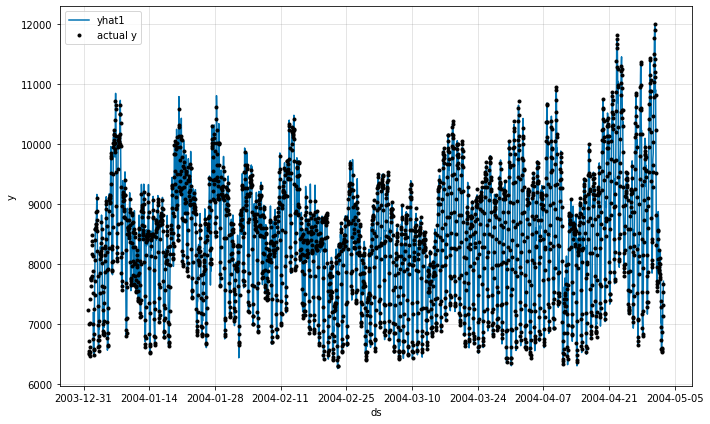

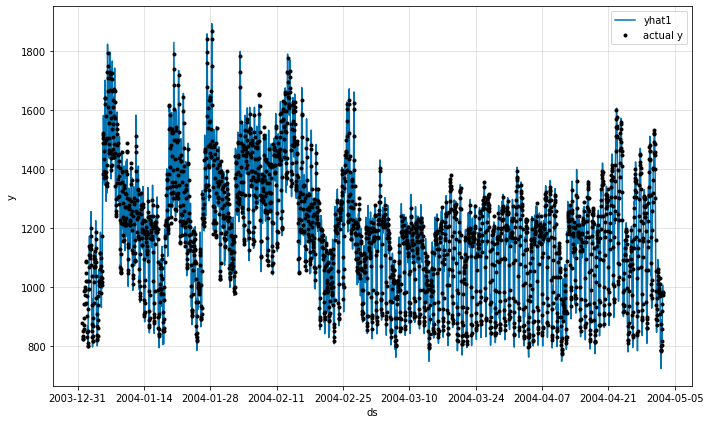

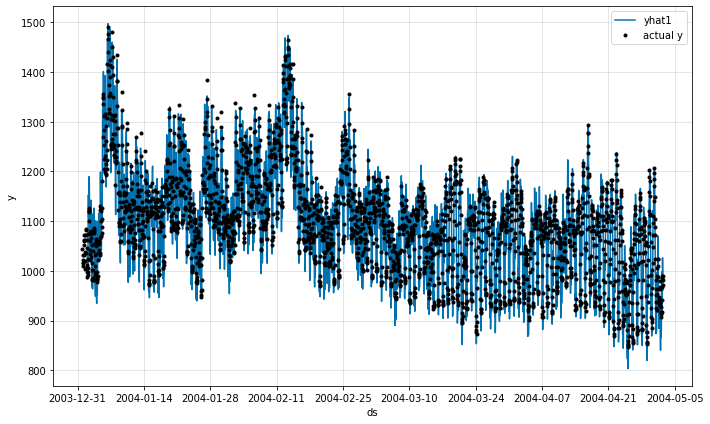

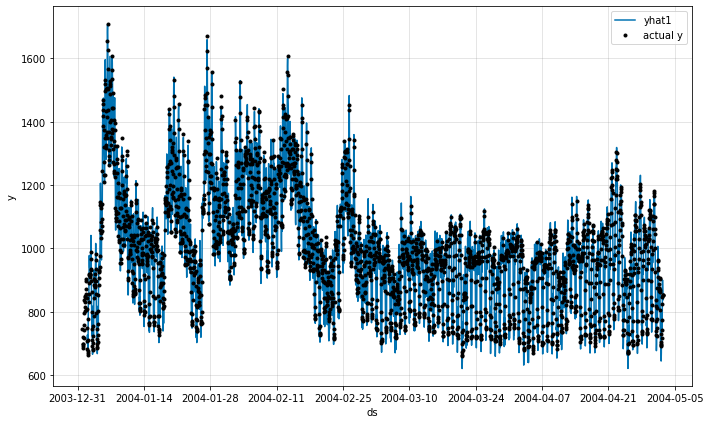

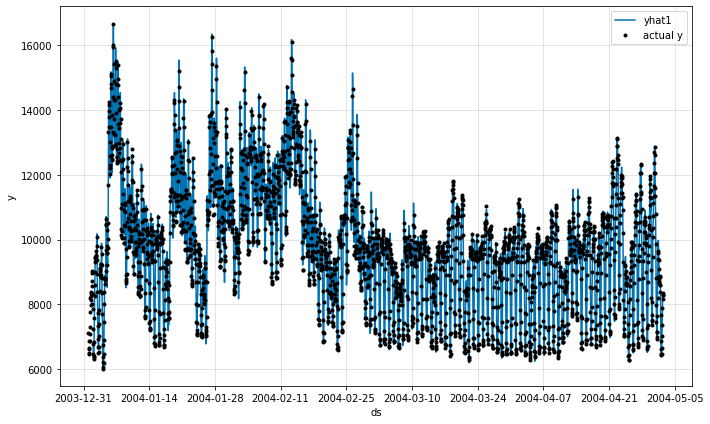

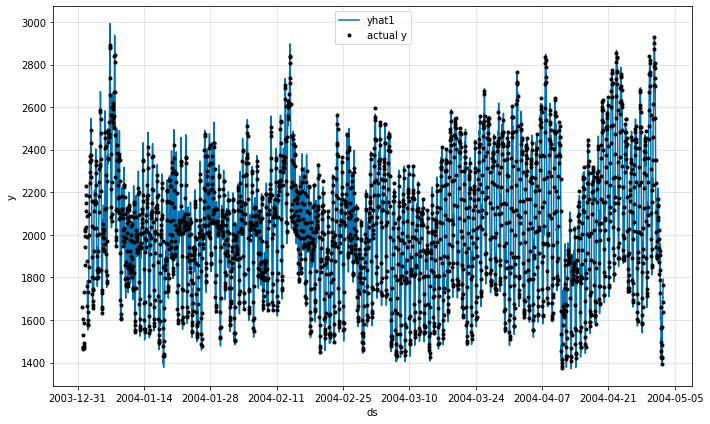

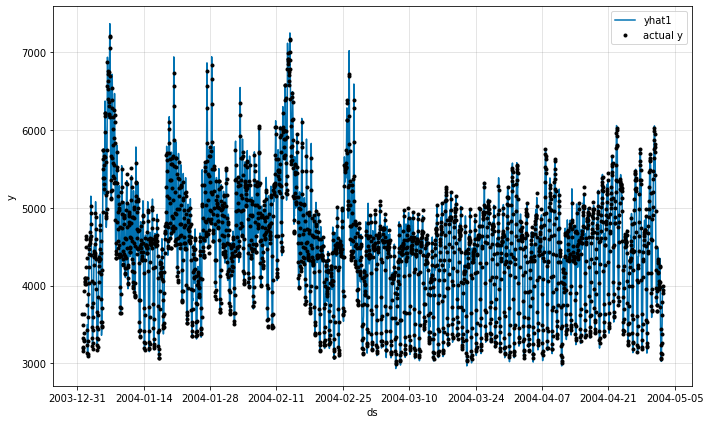

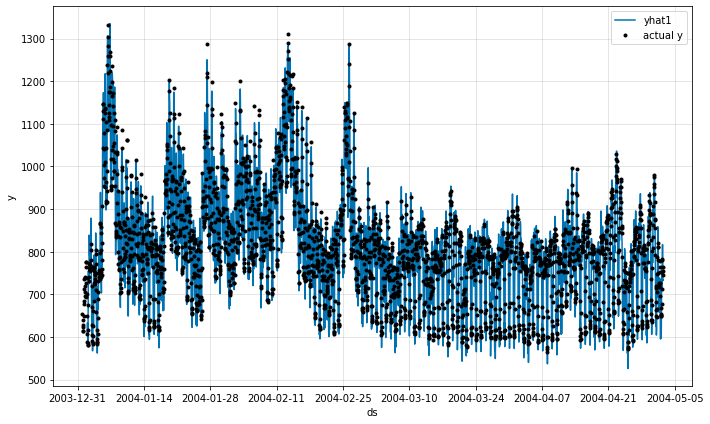

In [10]:
future = m.make_future_dataframe(df_train_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

In [11]:
test_metrics=m.test(df_test_list)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE       MSE
1         0.000 71.277 12711.464


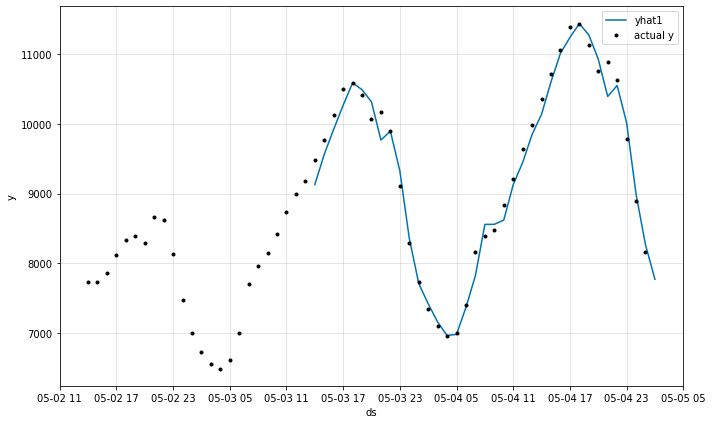

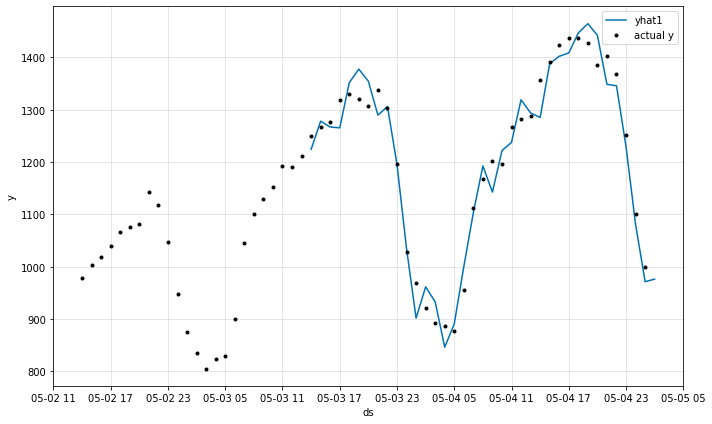

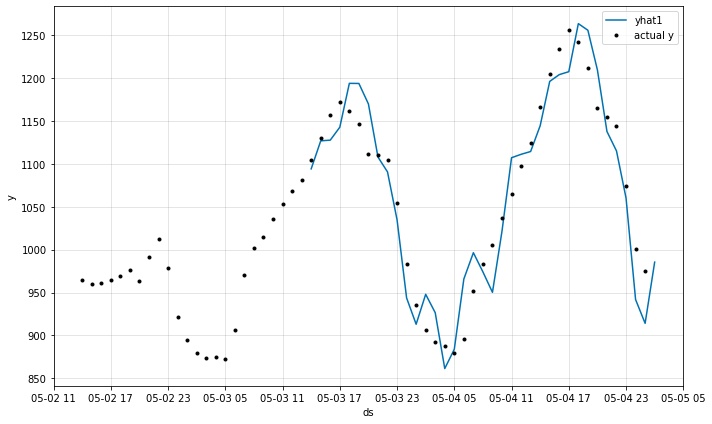

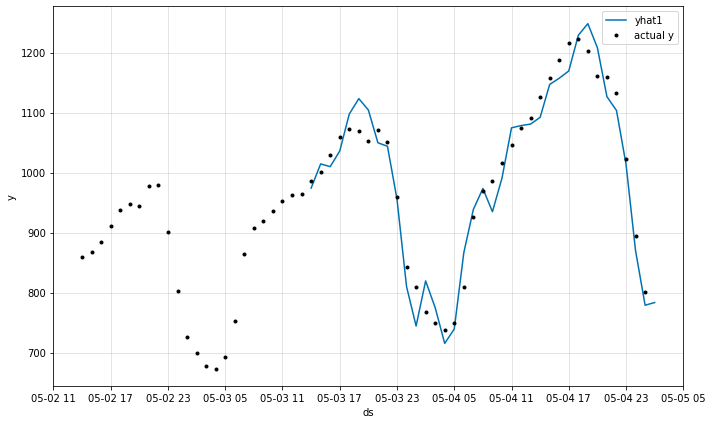

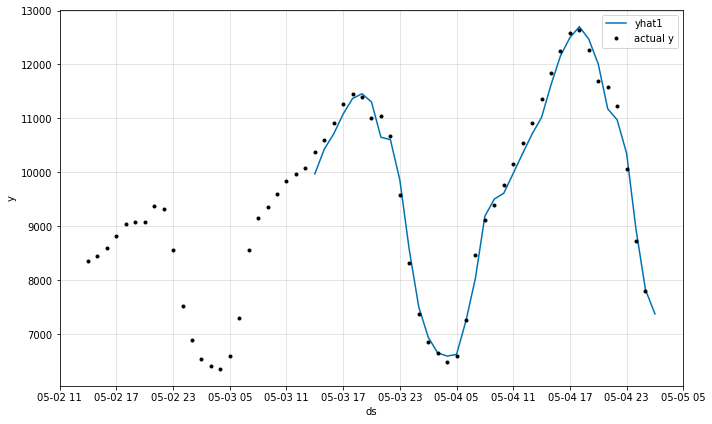

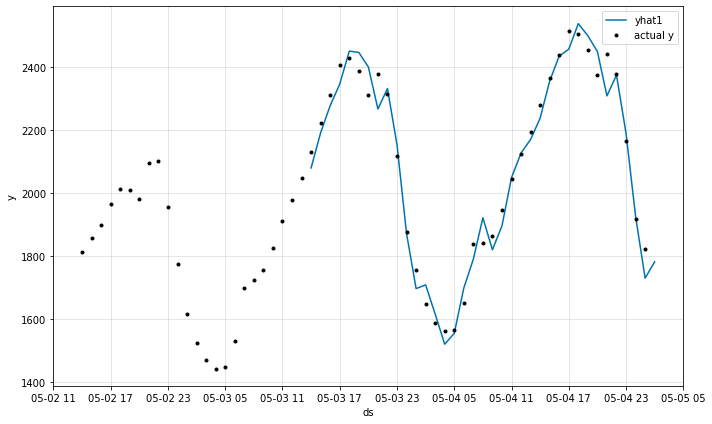

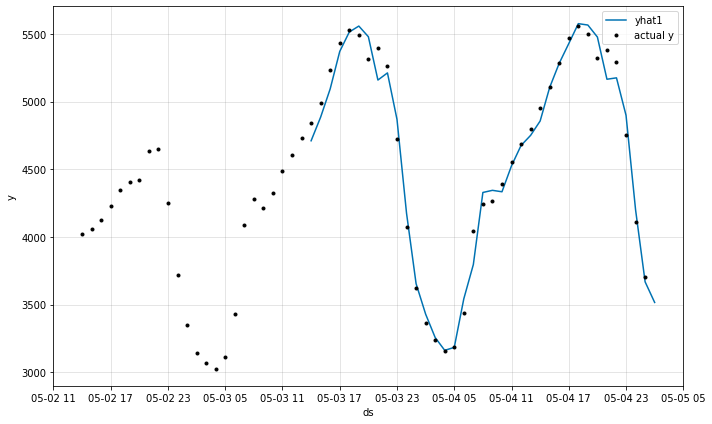

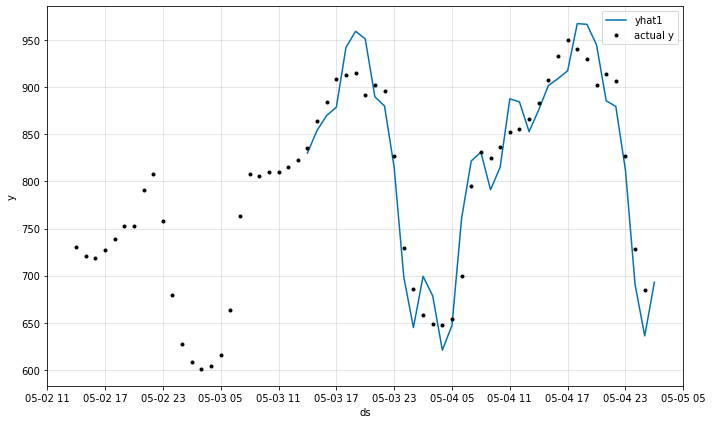

In [12]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

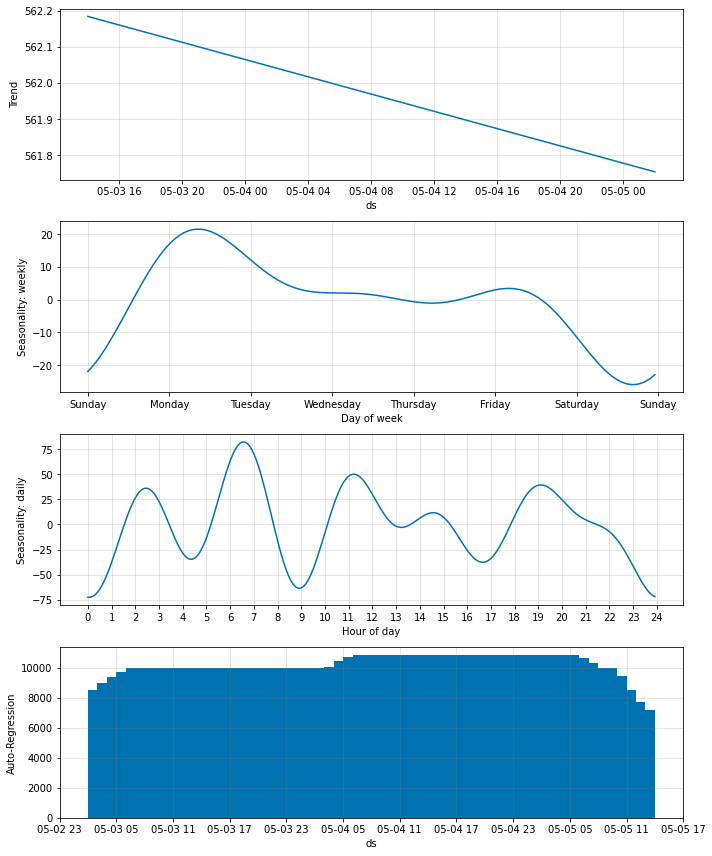

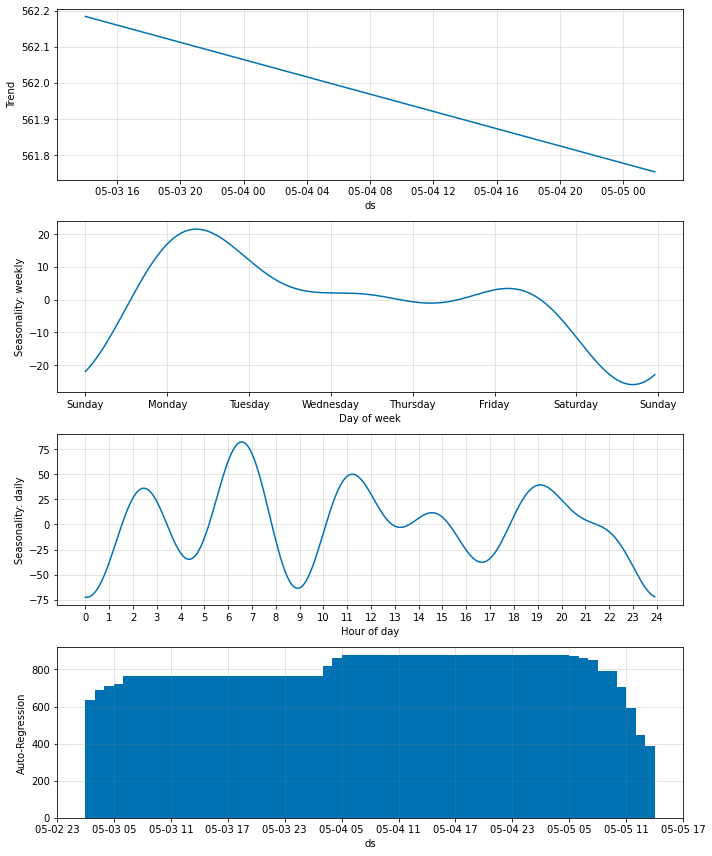

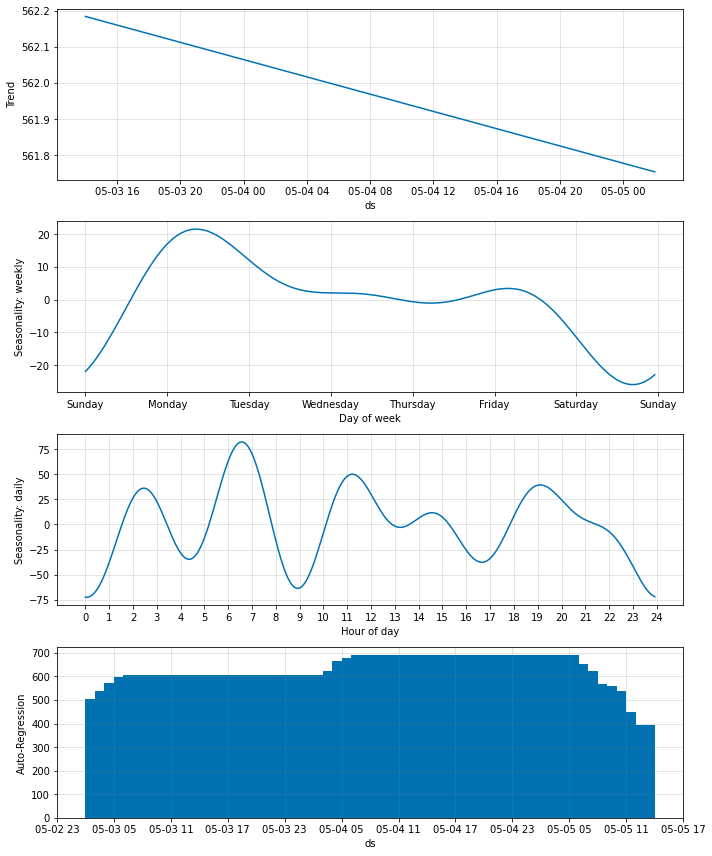

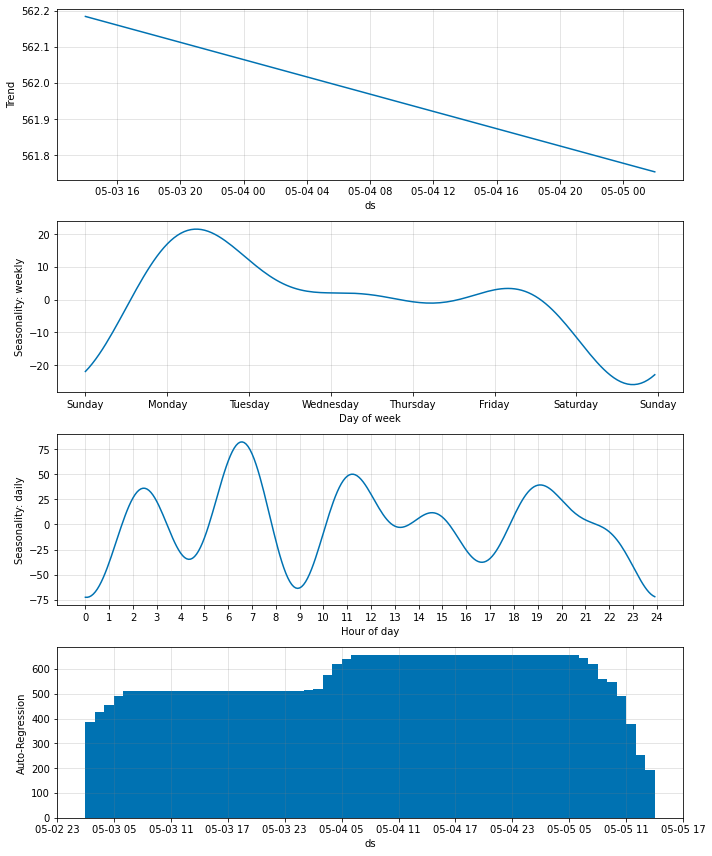

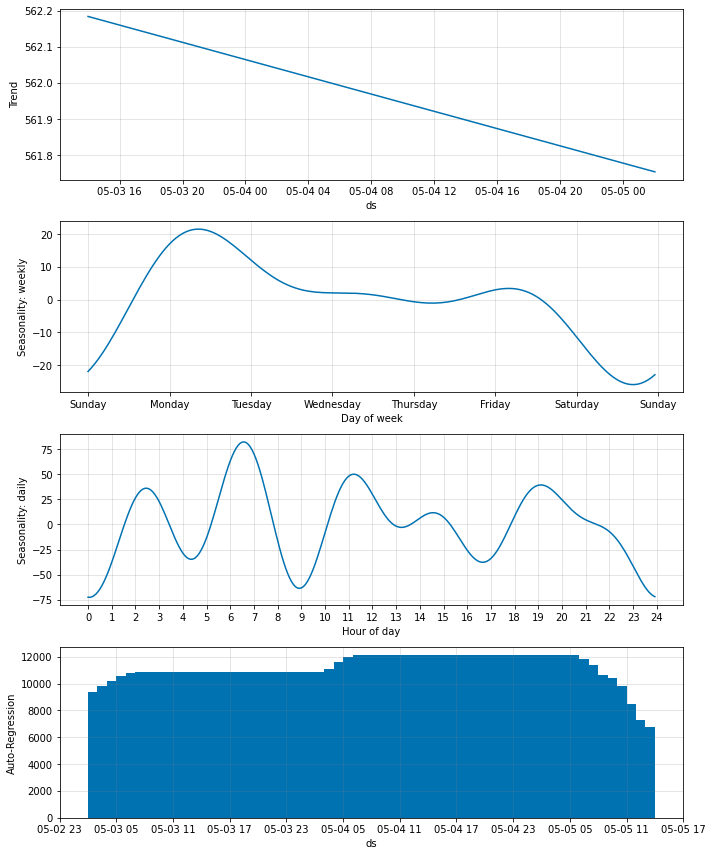

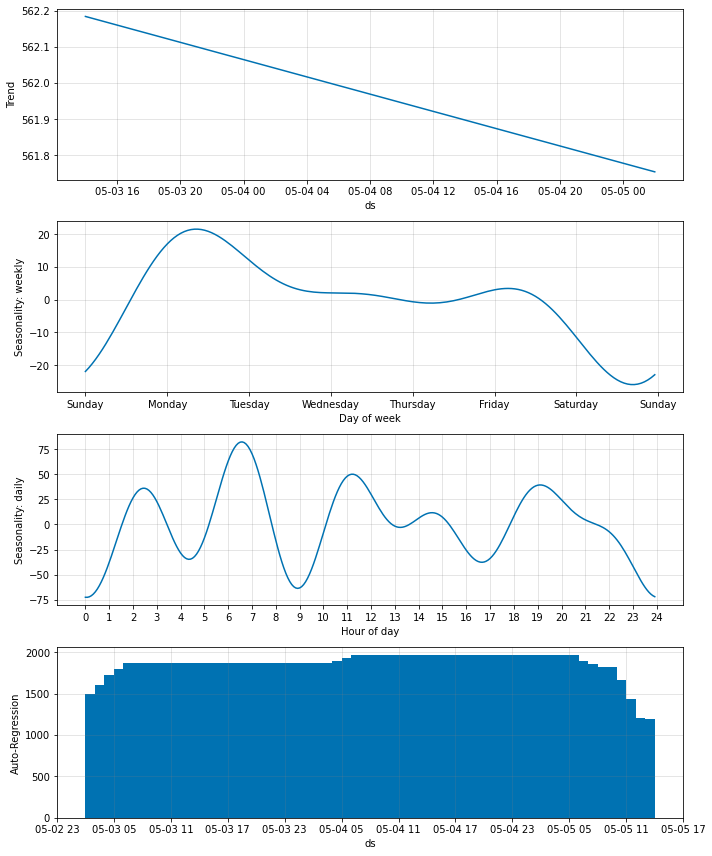

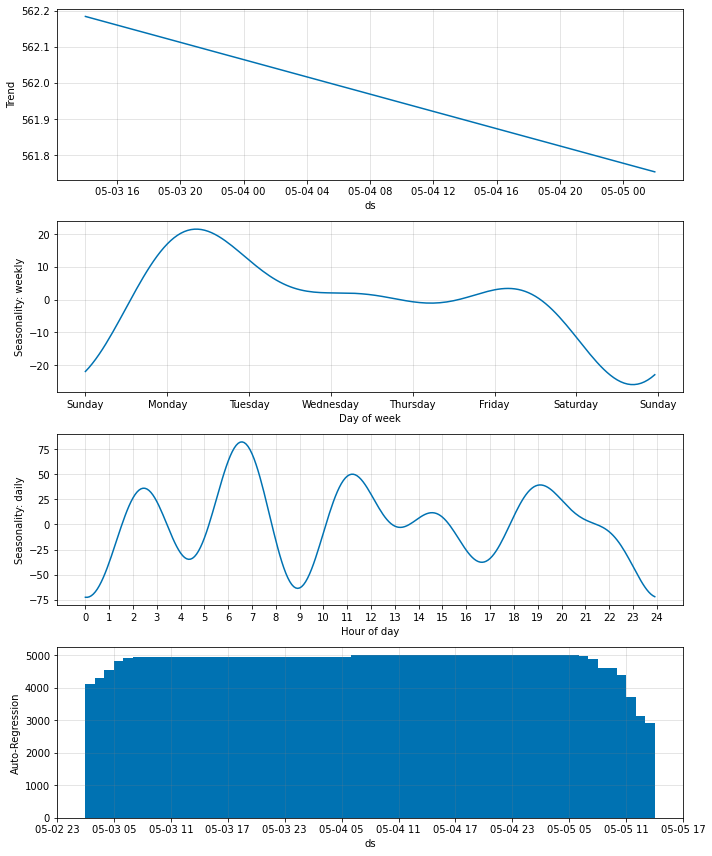

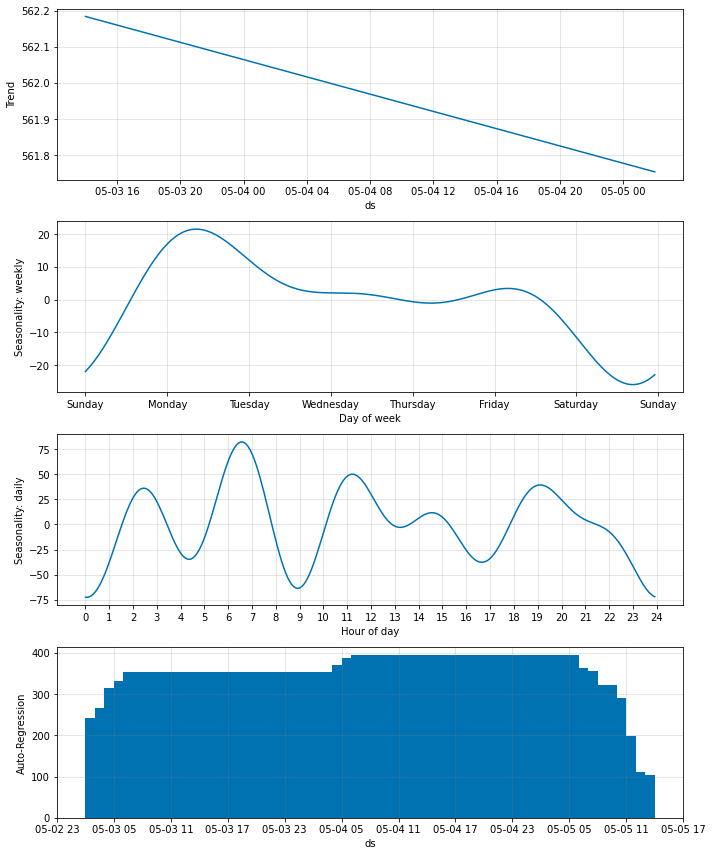

In [13]:
for frst in forecast:
    fig_comp = m.plot_components(frst)

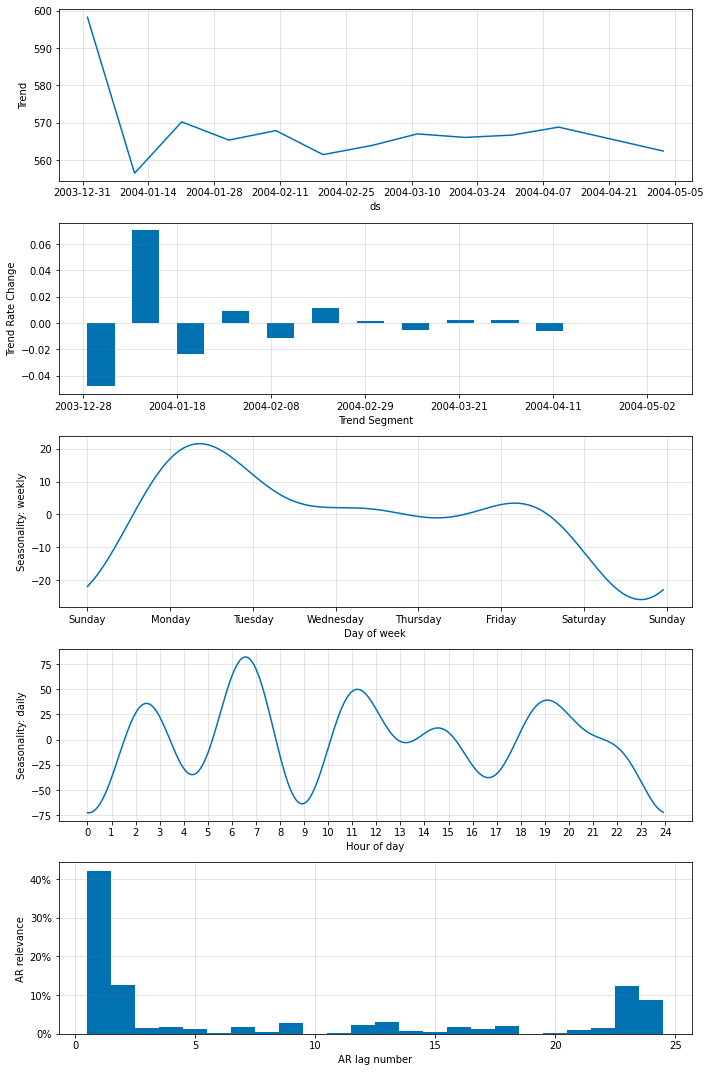

In [14]:
fig_param = m.plot_parameters()

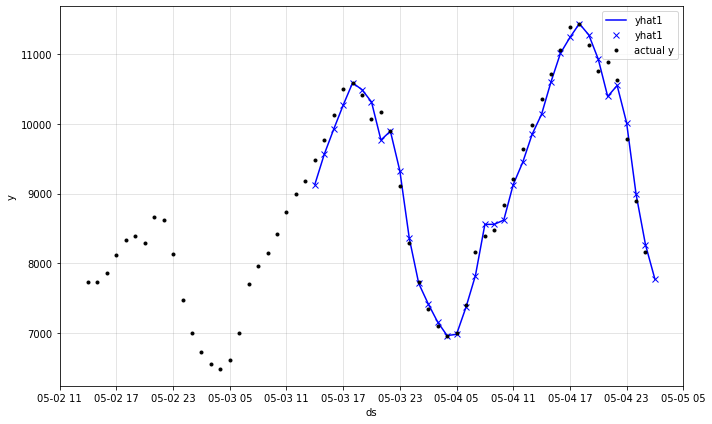

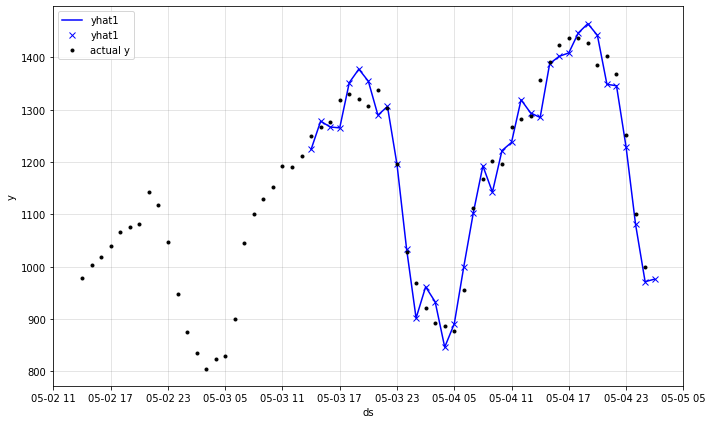

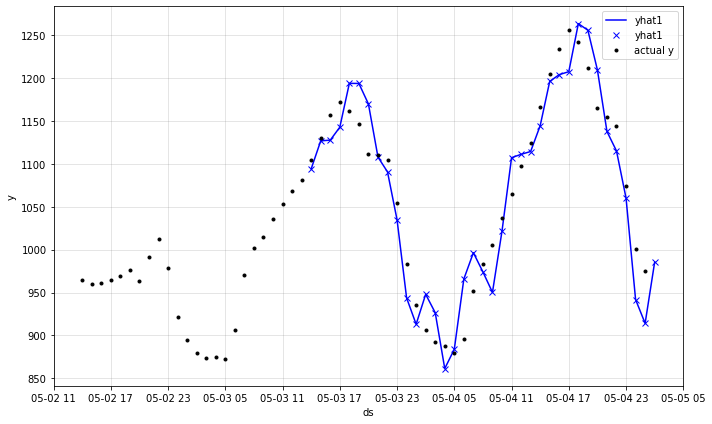

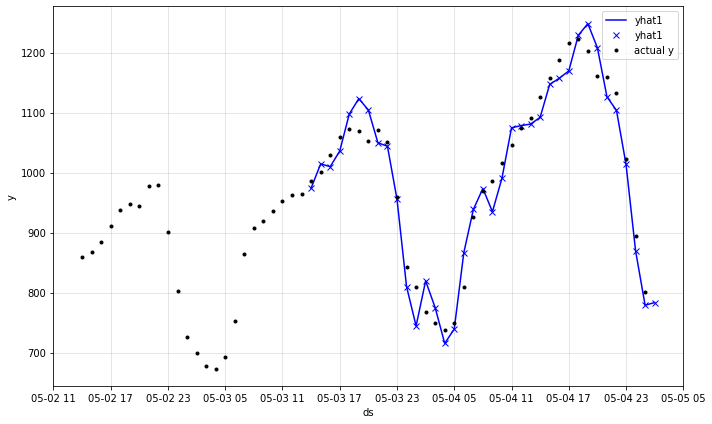

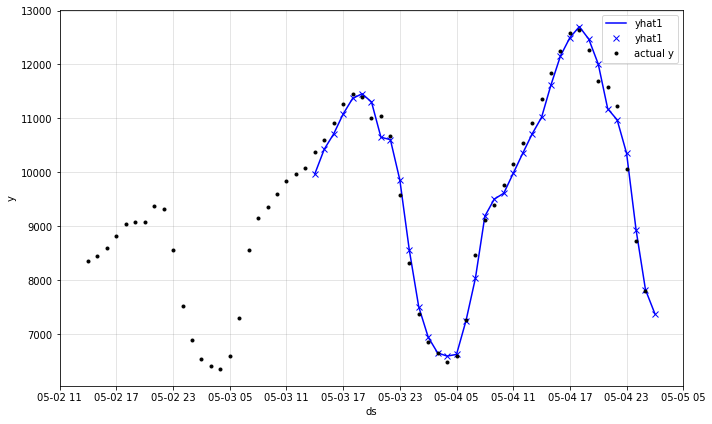

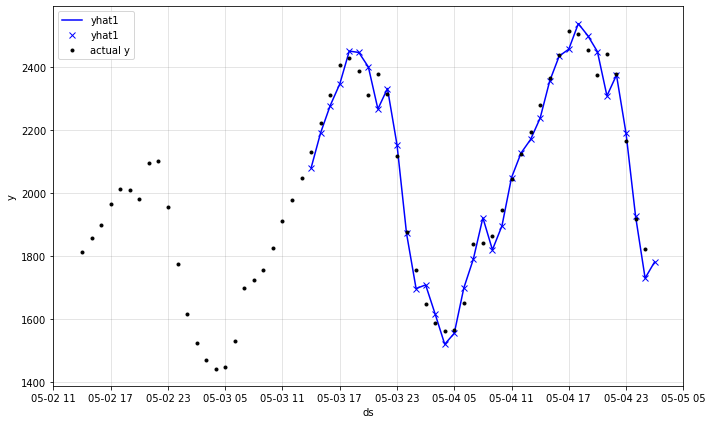

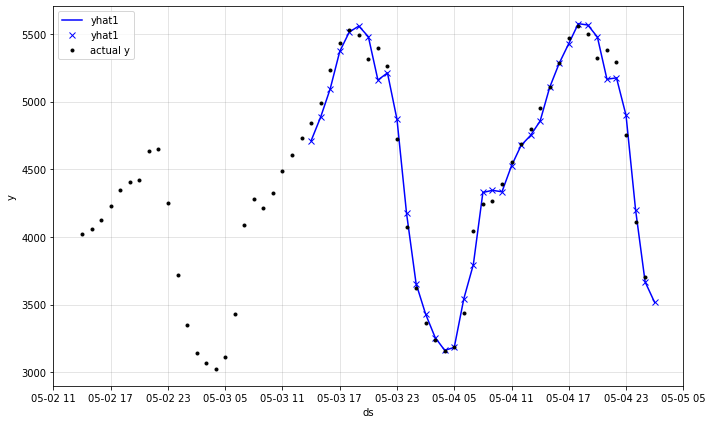

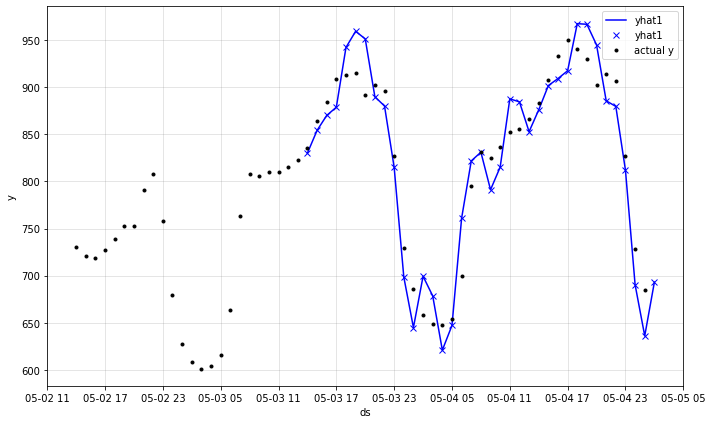

In [15]:
for frst in forecast:
    fig_fit = m.highlight_nth_step_ahead_of_each_forecast(1).plot(frst)

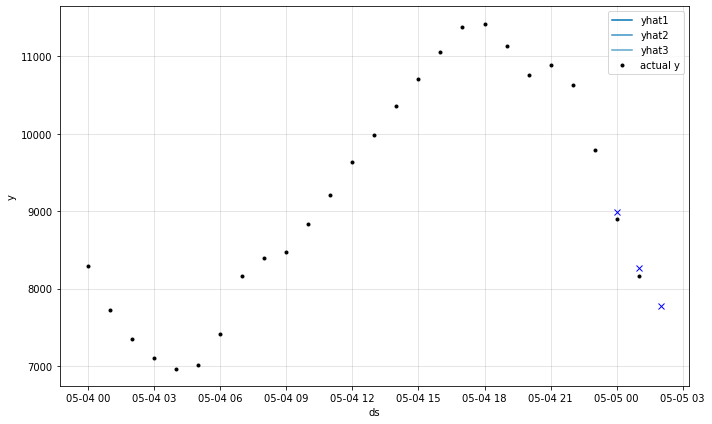

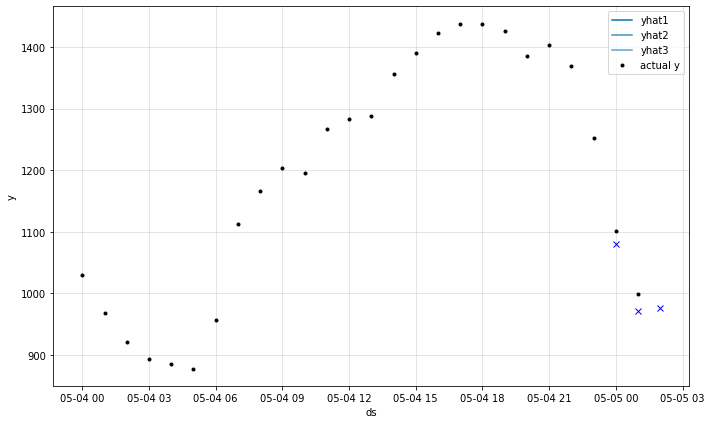

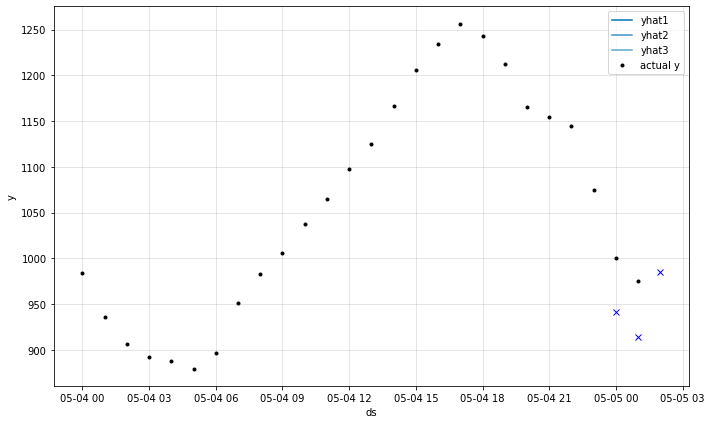

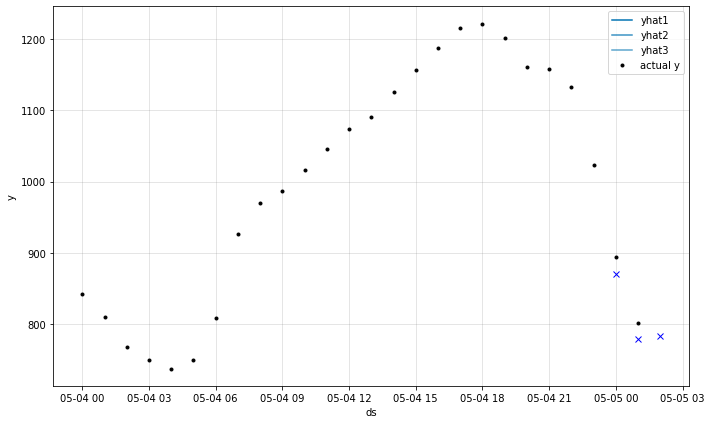

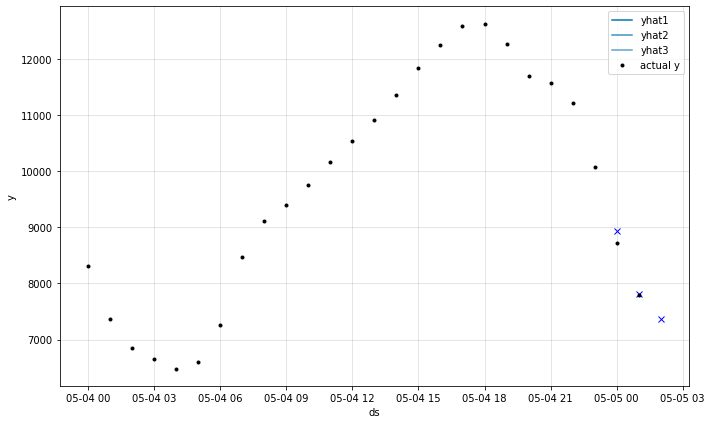

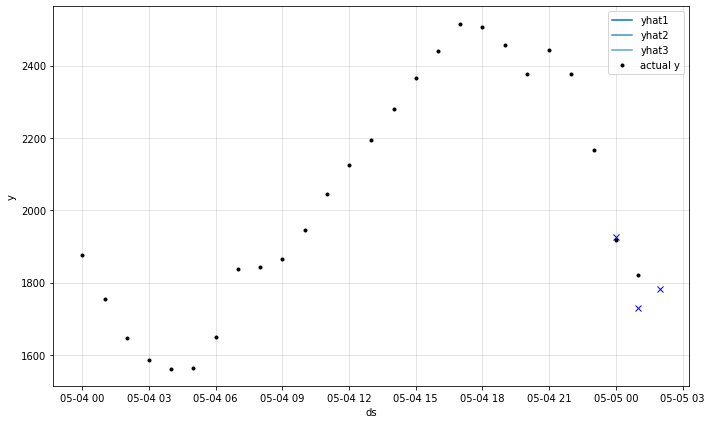

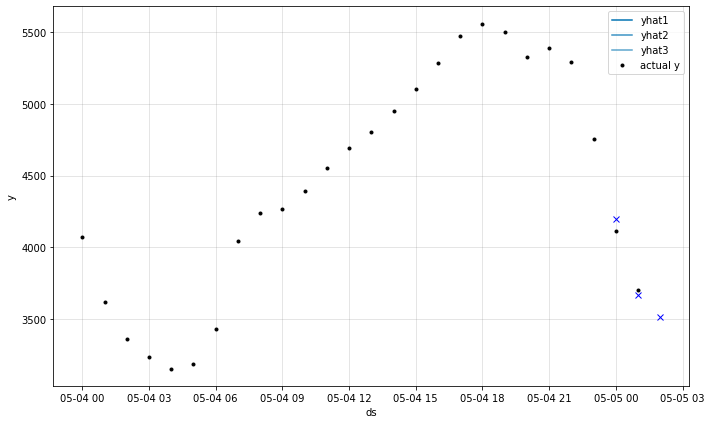

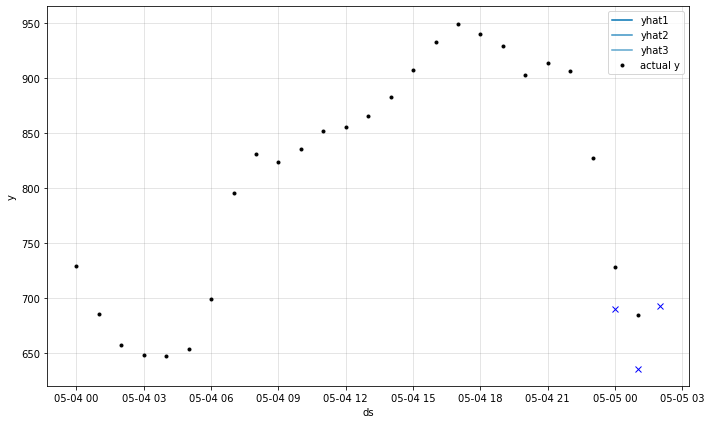

In [16]:
for frst in forecast:
    fig_prediction = m.plot_last_forecast(frst, include_previous_forecasts=2)

...

In [17]:
m = NeuralProphet(
    n_lags=24,
    num_hidden_layers = 2,
    d_hidden=20,
    learning_rate = 0.1
)
metrics = m.fit(df_train_list, freq='H', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 82
Epoch[82/82]: 100%|██████████| 82/82 [02:00<00:00,  1.47s/it, SmoothL1Loss=7.02e-5, MAE=67.6, MSE=1.31e+4, RegLoss=0]


In [18]:
m.test(df_test_list)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE       MSE
1         0.000 81.375 15707.566


SmoothL1Loss        MAE           MSE
0      0.000084  81.374619  15707.566406

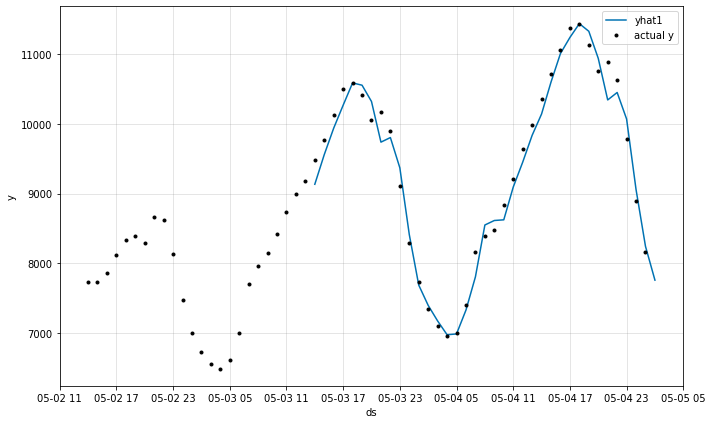

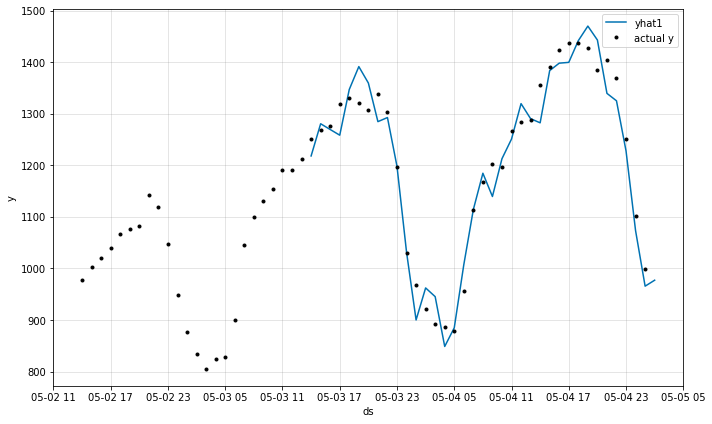

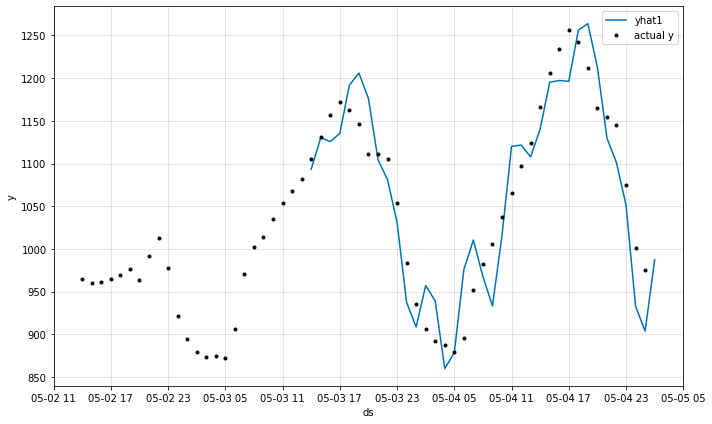

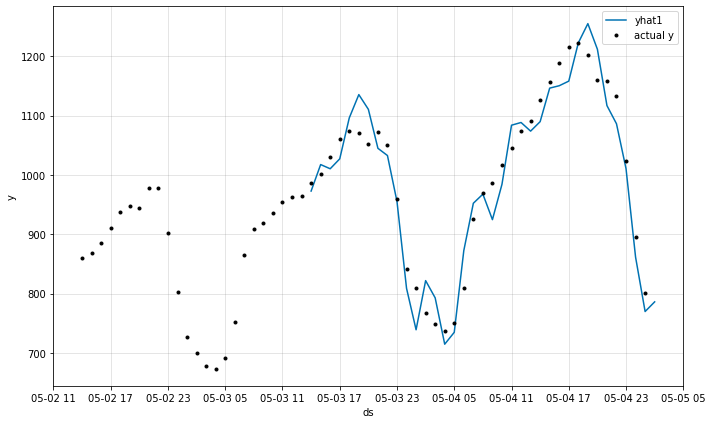

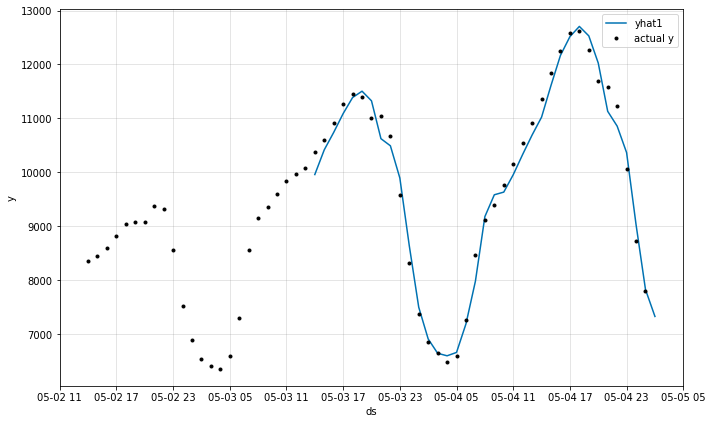

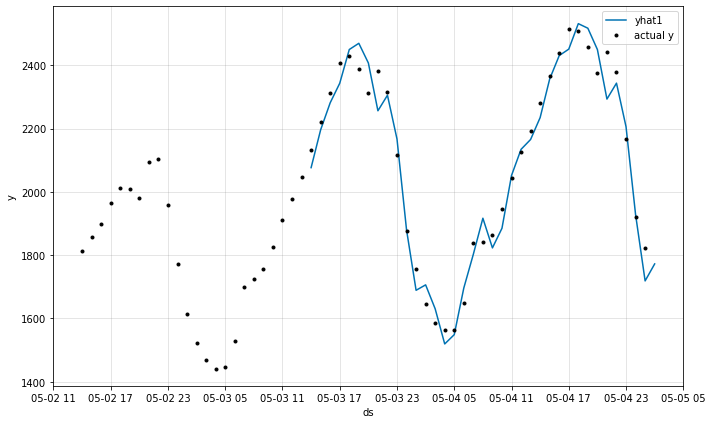

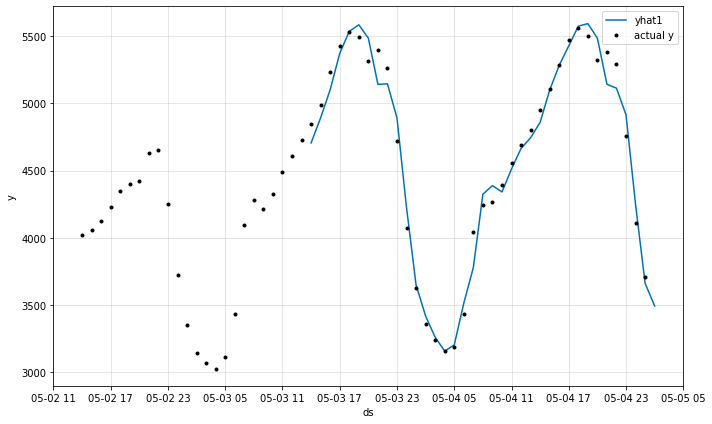

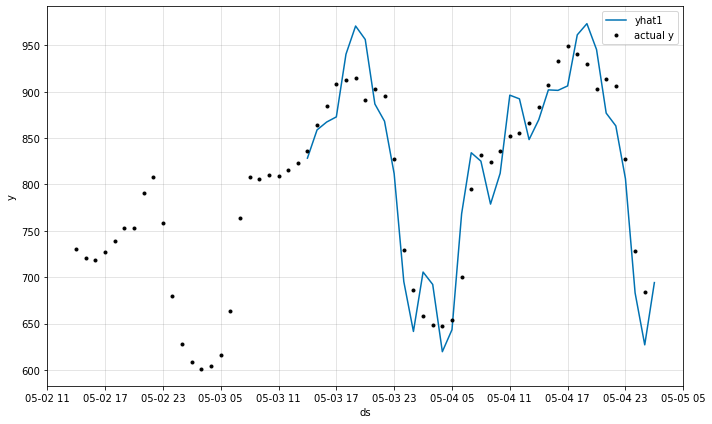

In [19]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

...

In [20]:
m = NeuralProphet(
    n_lags=24,
    # ar_sparsity=0.5,
    num_hidden_layers = 2,
    d_hidden=20,
    learning_rate = 0.001
)
metrics = m.fit(df_train_list, freq='H', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 82
Epoch[82/82]: 100%|██████████| 82/82 [01:49<00:00,  1.34s/it, SmoothL1Loss=7.9e-5, MAE=72.3, MSE=1.47e+4, RegLoss=0]


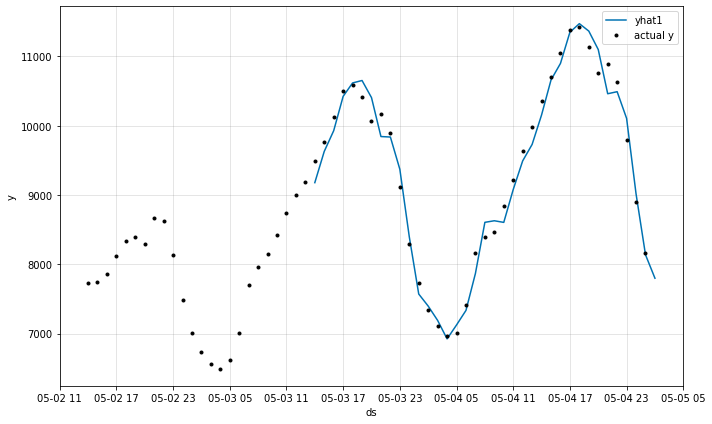

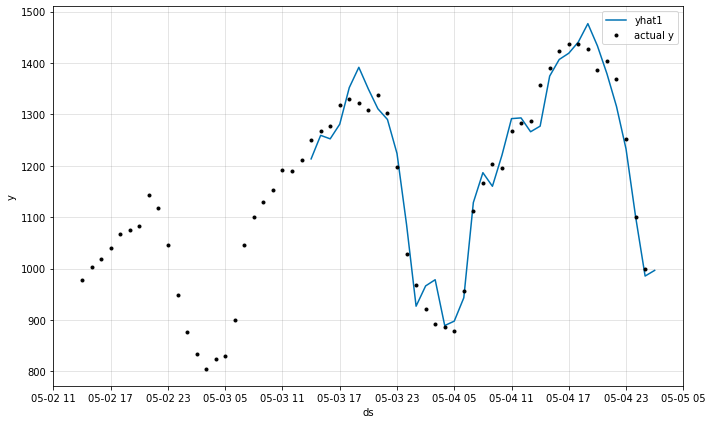

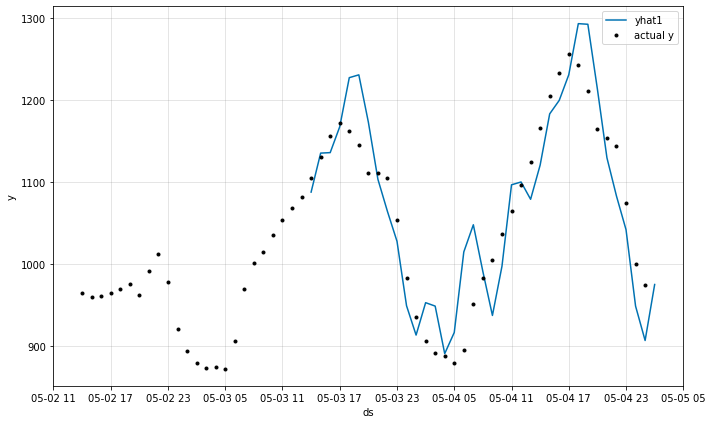

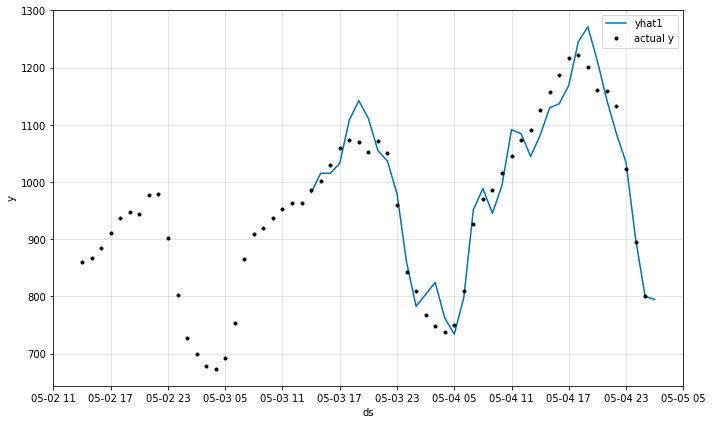

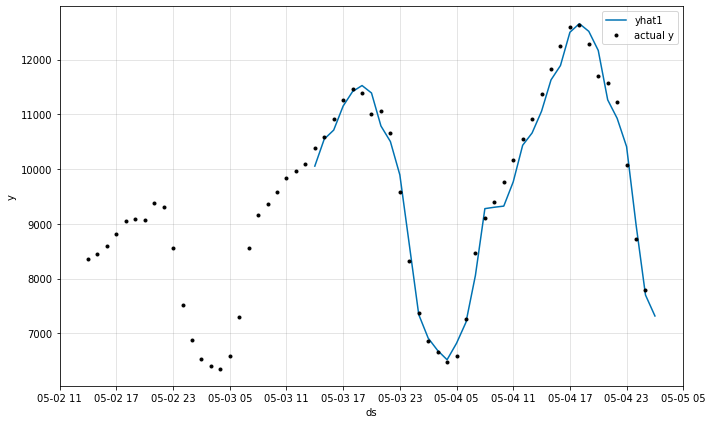

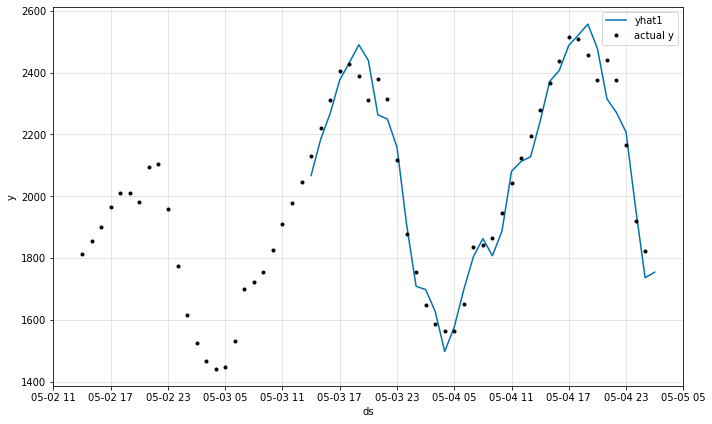

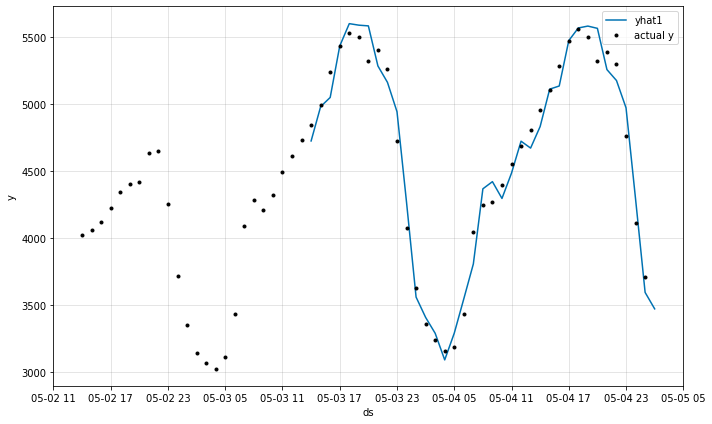

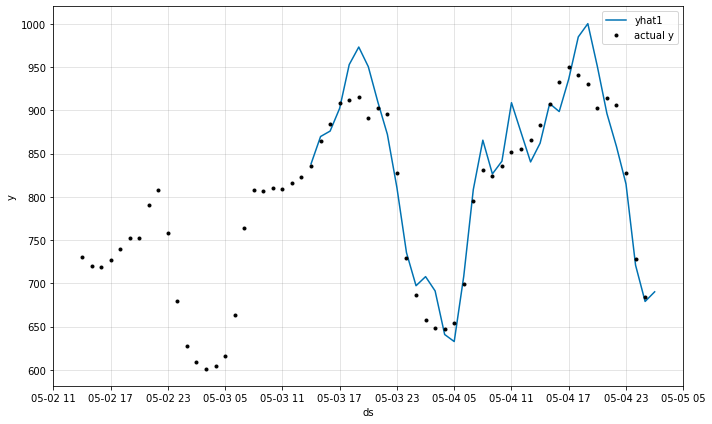

In [21]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

In [22]:
m = NeuralProphet(n_lags=0)
metrics = m.fit(df_train_list, freq='H', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 82


  0%|          | 0/318 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.43E-02, min: 7.93E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.24E-01
Epoch[82/82]: 100%|██████████| 82/82 [01:12<00:00,  1.14it/s, SmoothL1Loss=0.0635, MAE=2.96e+3, MSE=1.18e+7, RegLoss=0]


INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss      MAE          MSE
1         0.064 3023.261 11925215.000


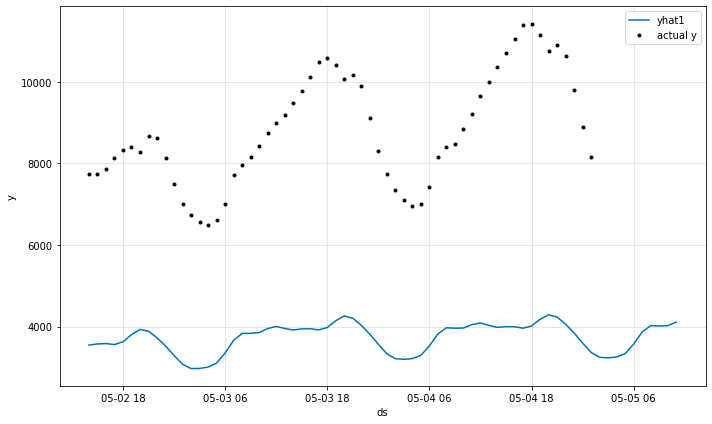

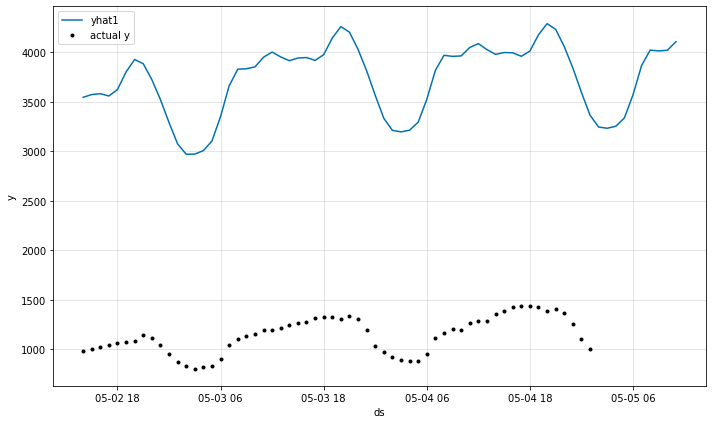

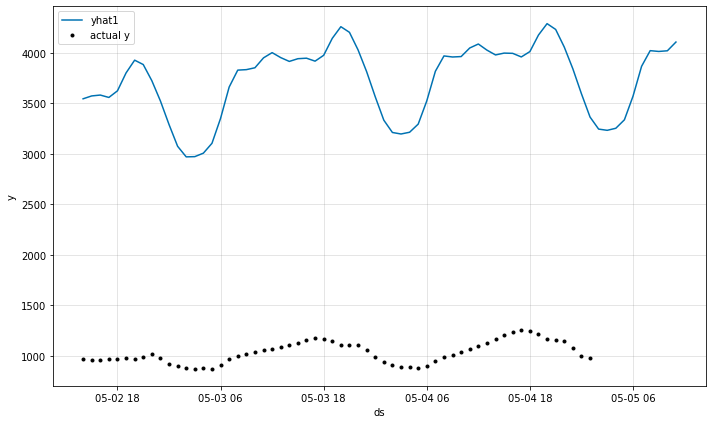

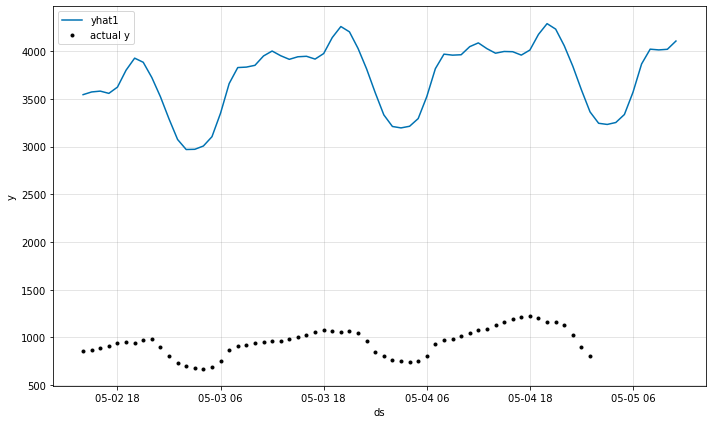

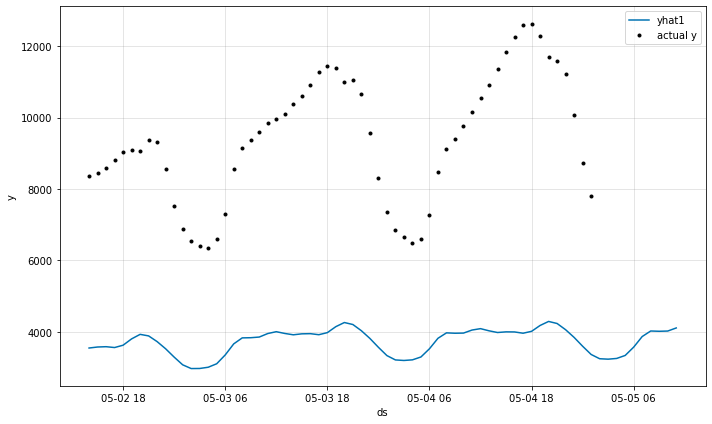

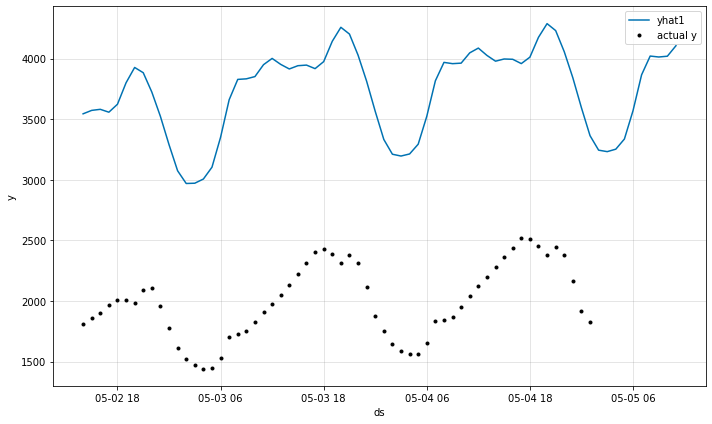

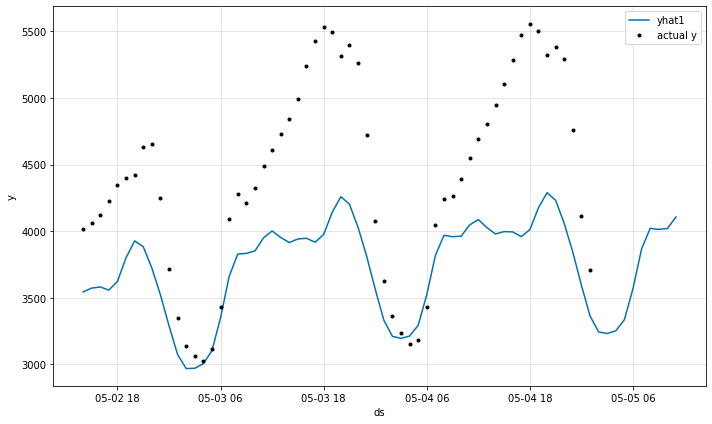

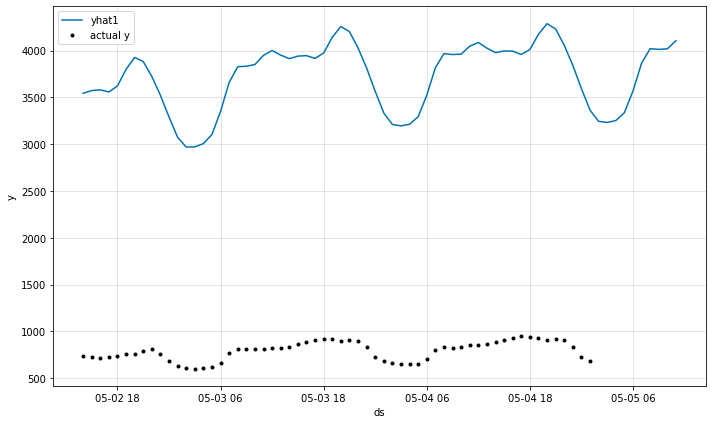

In [23]:
m.test(df_test_list)
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True, periods=10)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

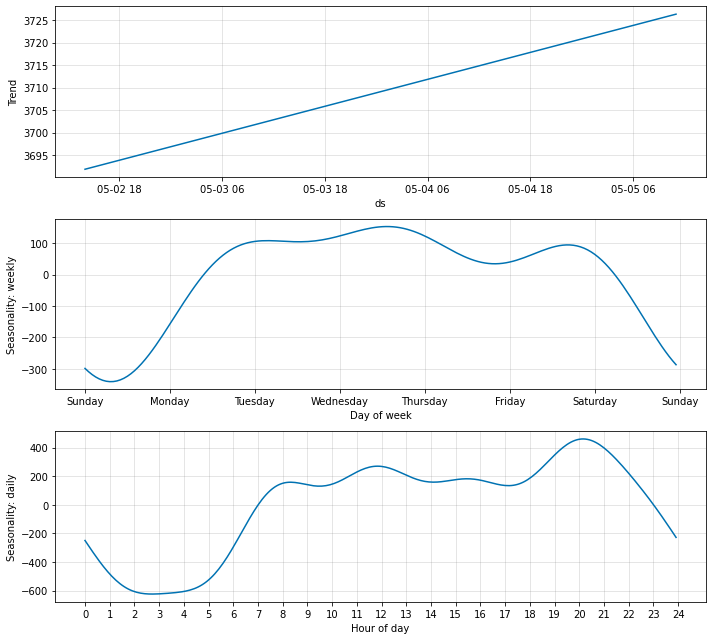

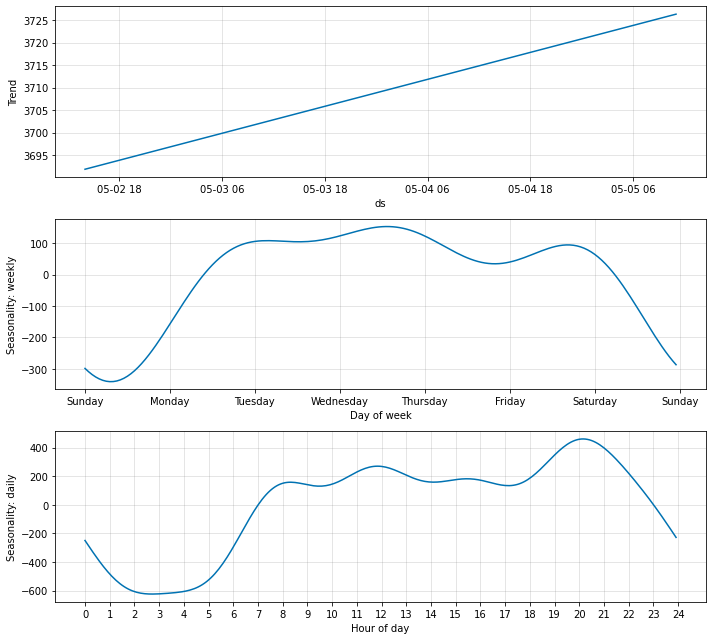

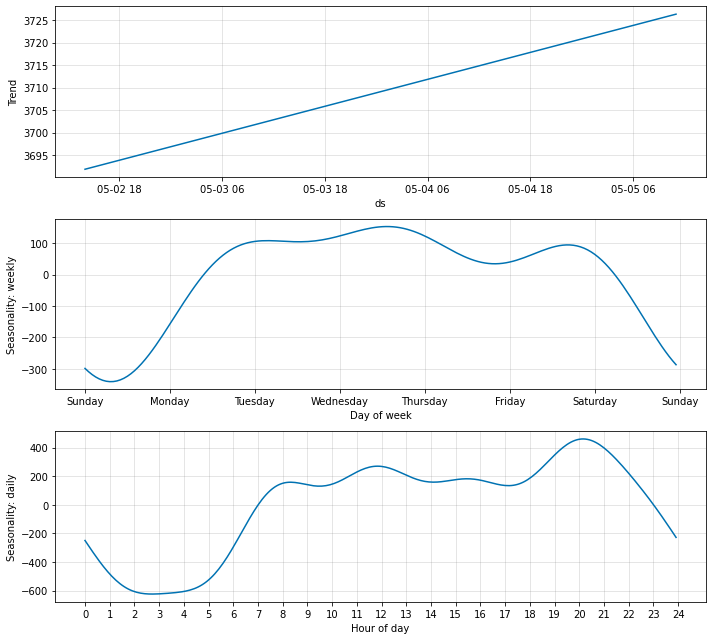

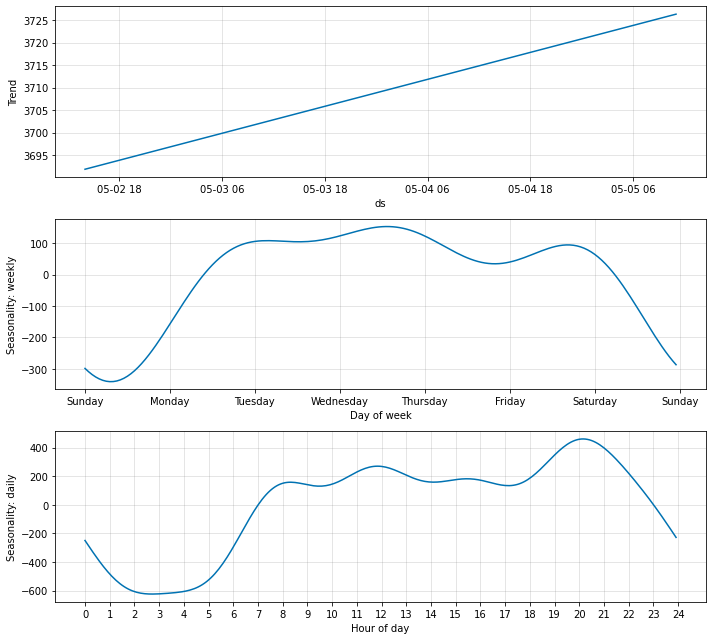

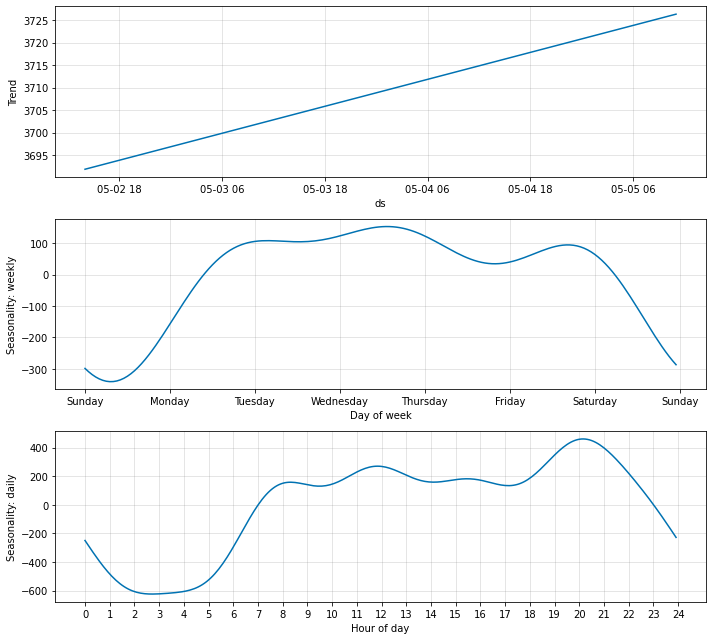

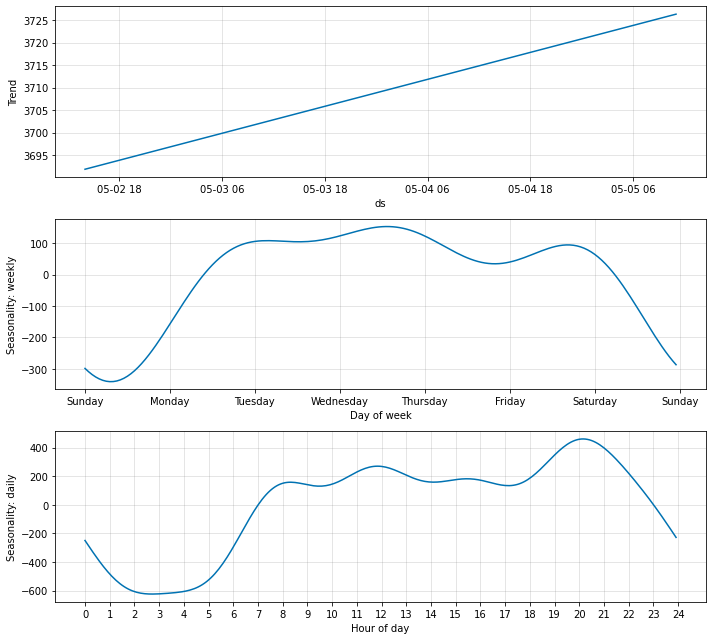

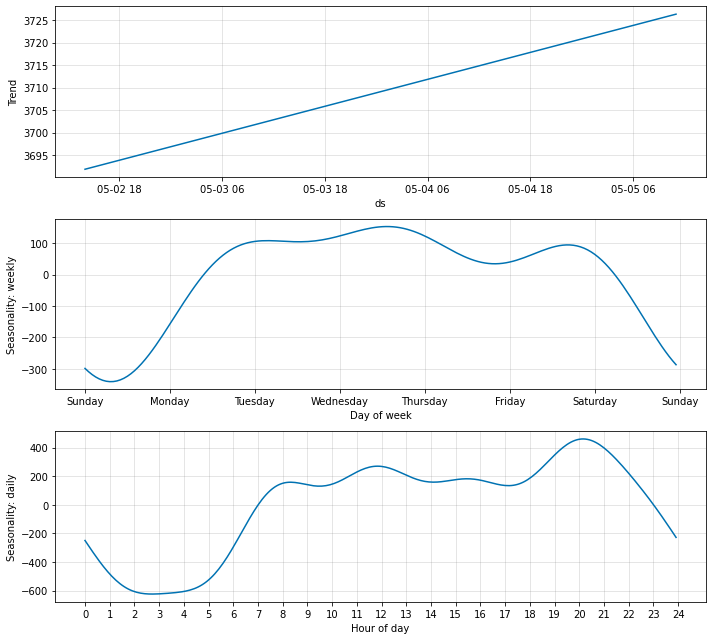

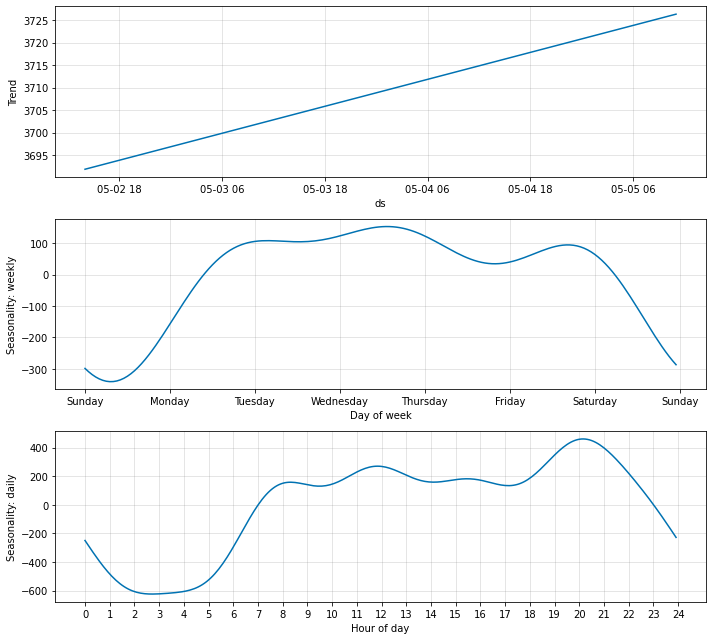

In [24]:
for frst in forecast:
    fig_comp = m.plot_components(frst)

In [26]:
df_train_list_norm=scale_data(df_train_list)
df_test_list_norm=scale_data(df_test_list)

In [27]:
m = NeuralProphet(n_lags=0)
metrics = m.fit(df_train_list_norm, freq='H', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 82


  0%|          | 0/318 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.77E-02, min: 1.52E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.80E-01
Epoch[82/82]: 100%|██████████| 82/82 [01:15<00:00,  1.09it/s, SmoothL1Loss=0.0177, MAE=0.0997, MSE=0.0167, RegLoss=0]


INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.018  0.100  0.017


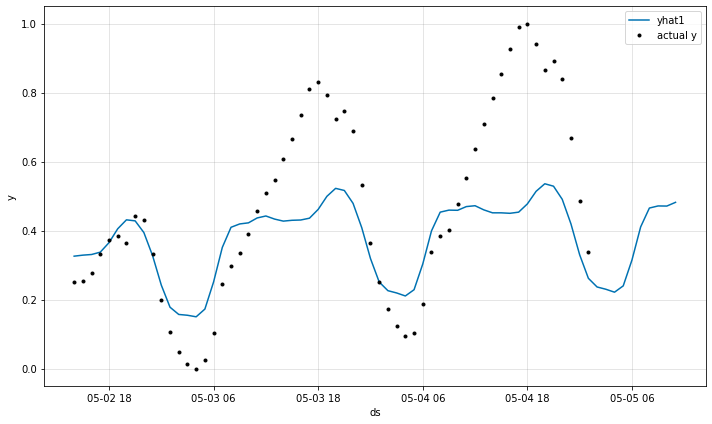

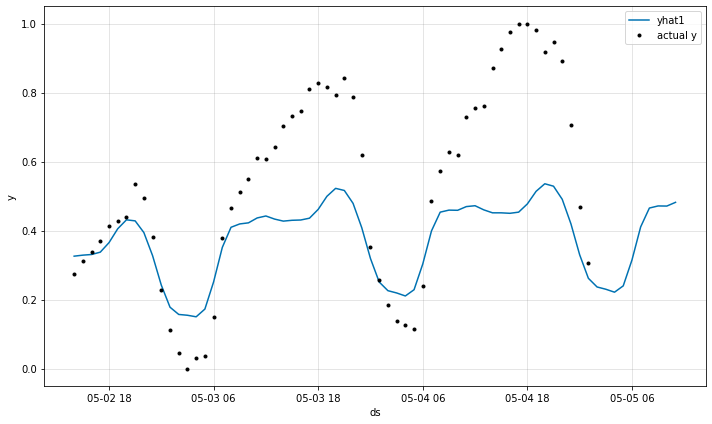

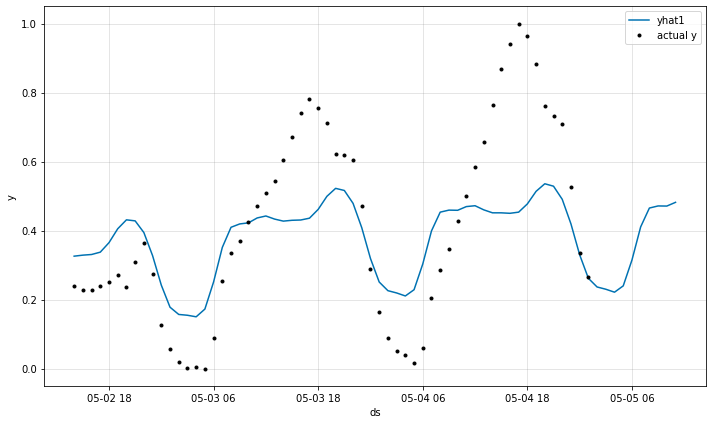

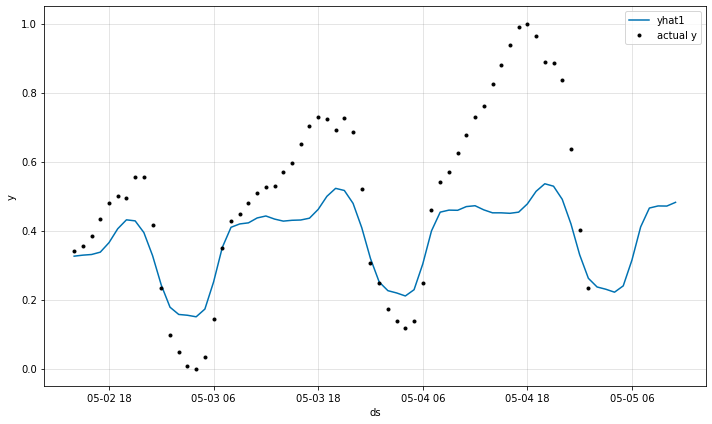

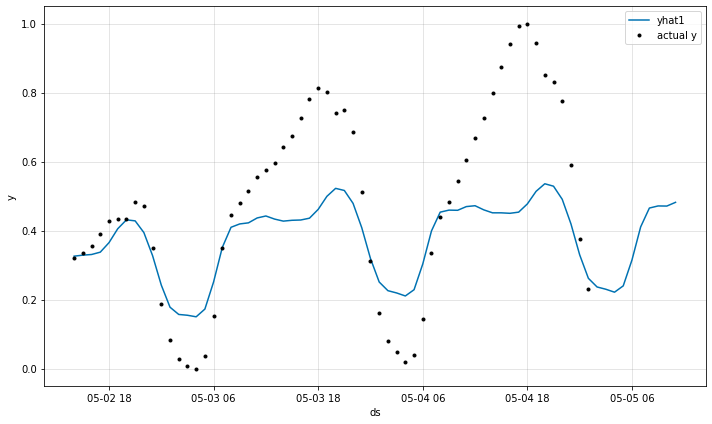

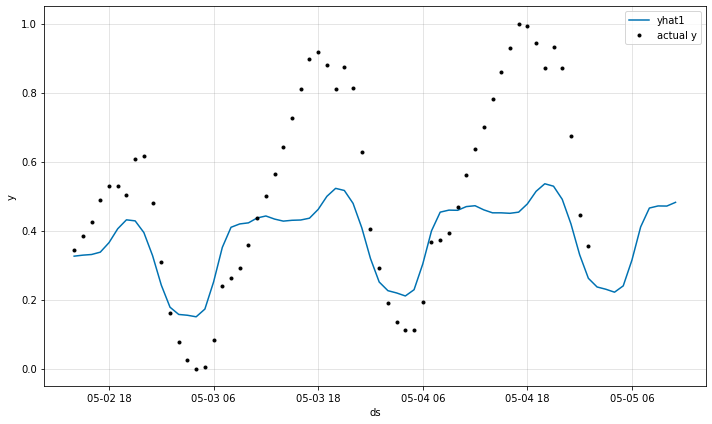

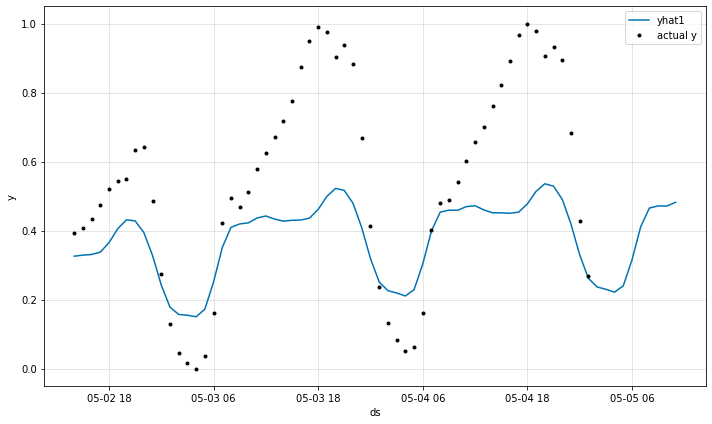

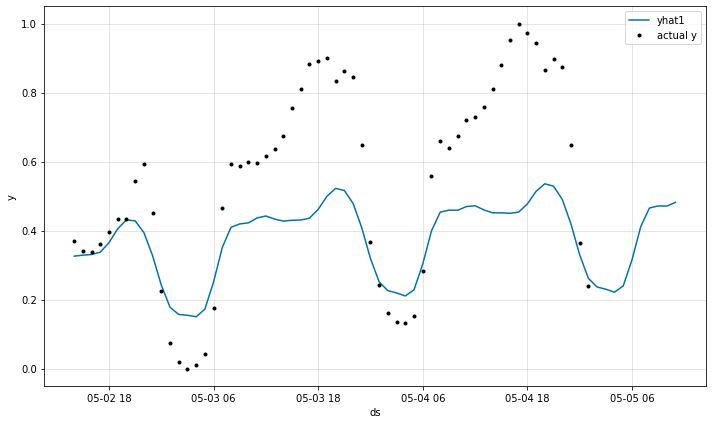

In [28]:
m.test(df_train_list_norm)
future = m.make_future_dataframe(df_test_list_norm, n_historic_predictions=True, periods=10)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

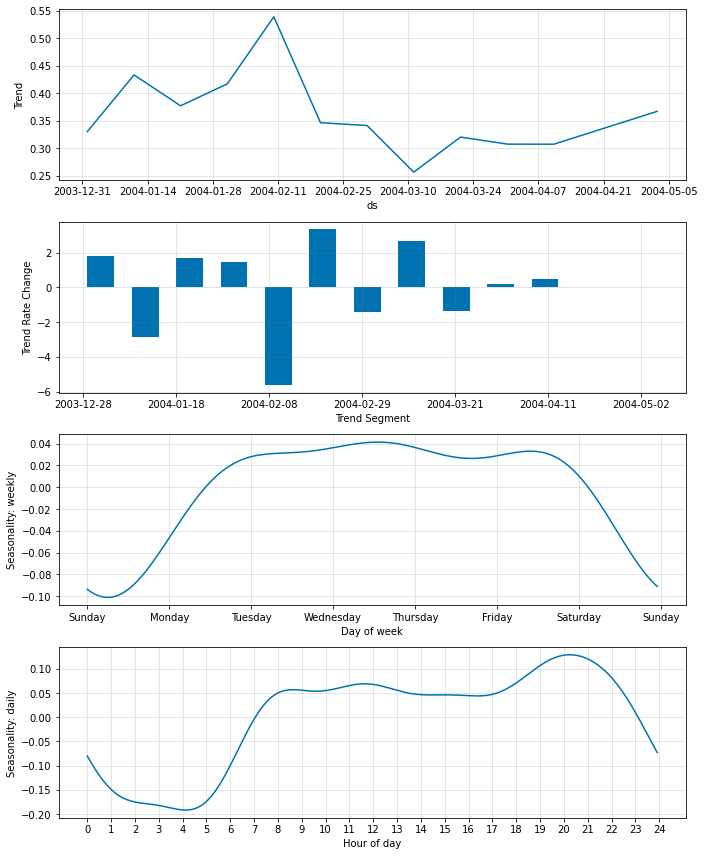

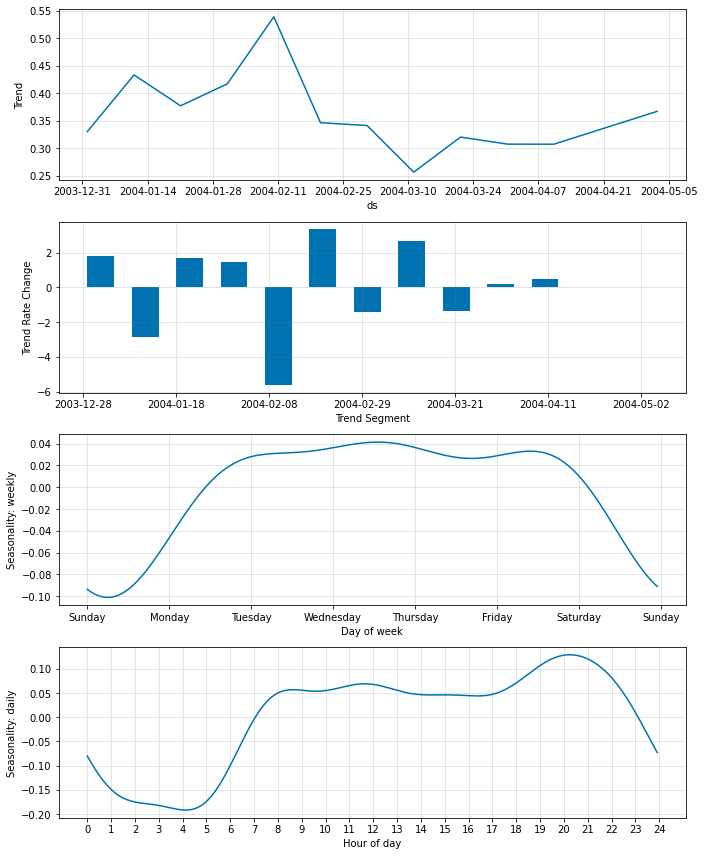

In [29]:
m.plot_parameters()

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE    MSE
1         0.057  0.181  0.053


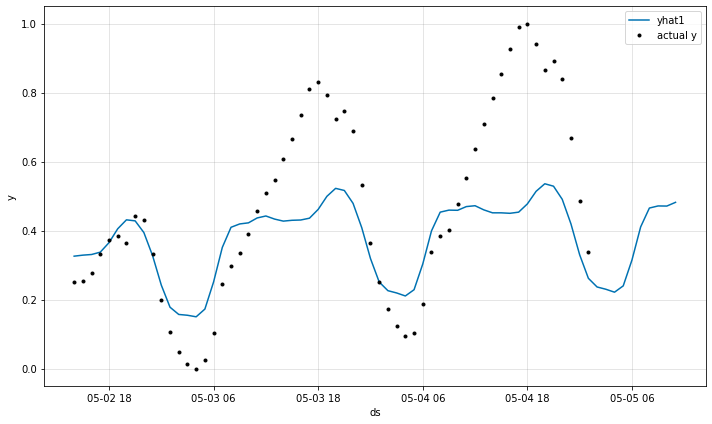

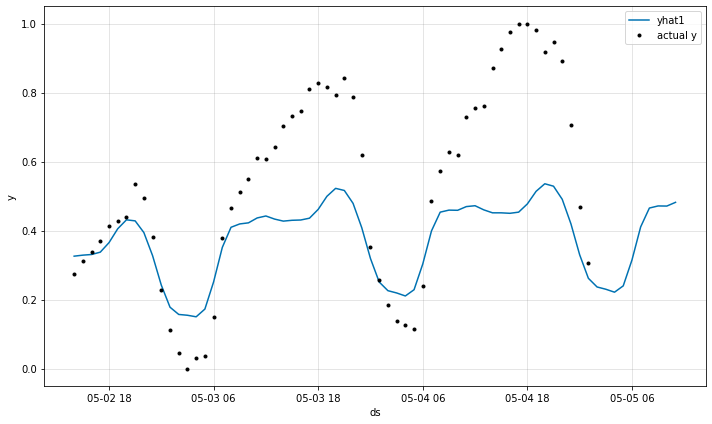

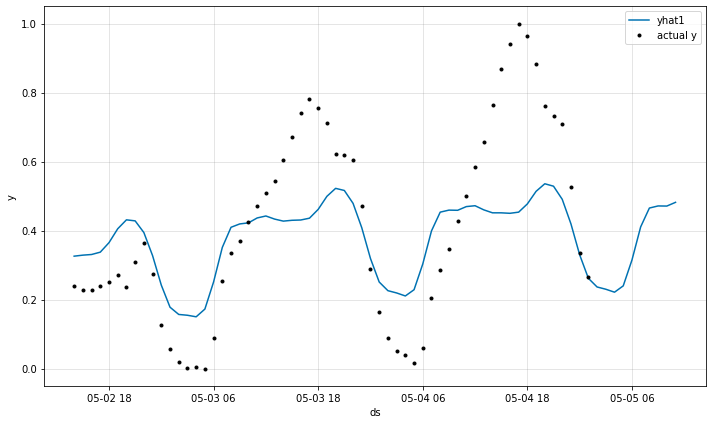

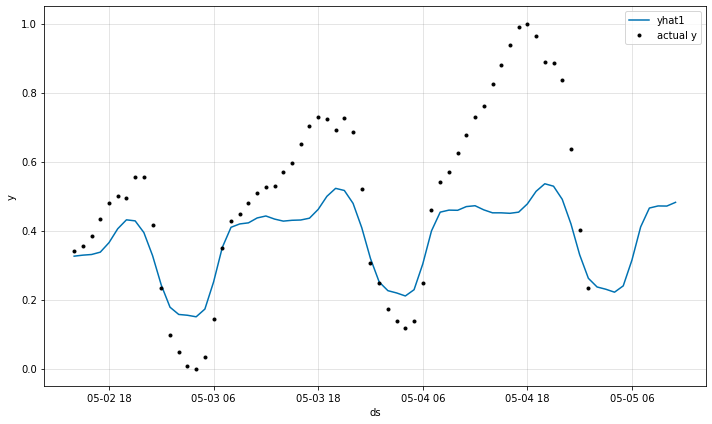

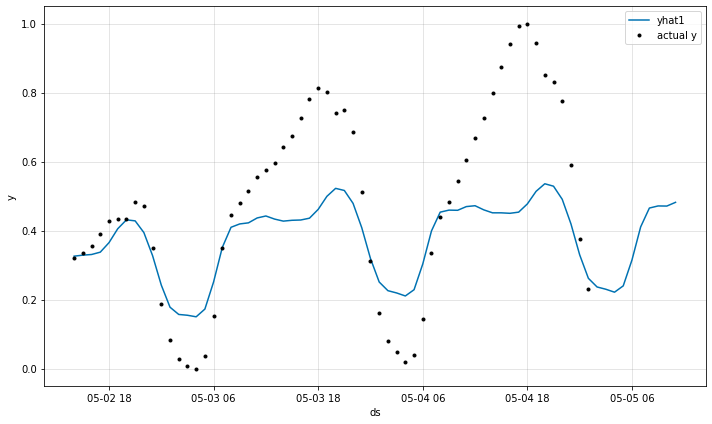

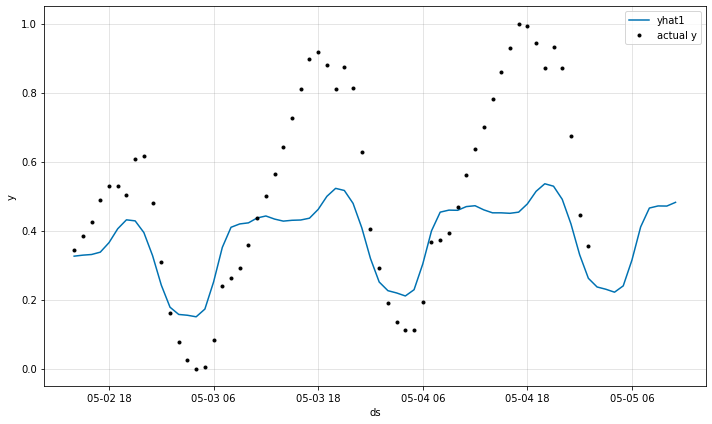

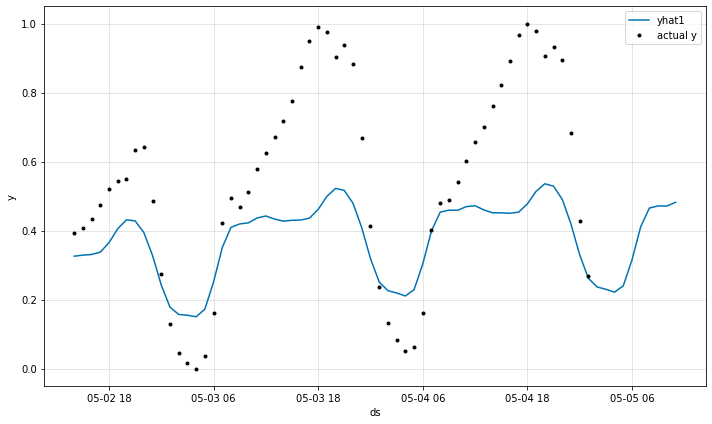

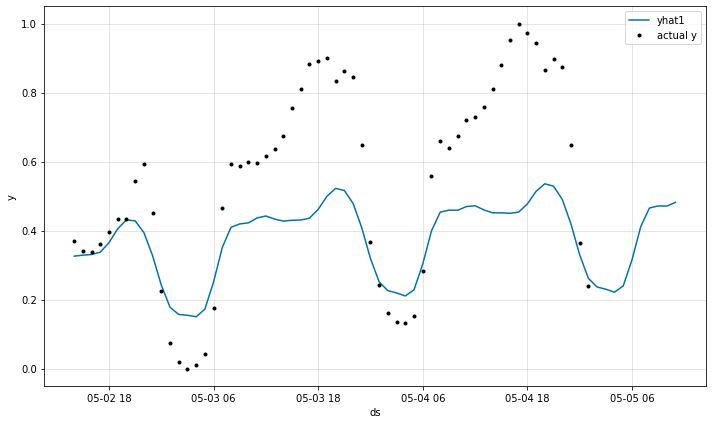

In [30]:
m.test(df_test_list_norm)
future = m.make_future_dataframe(df_test_list_norm, n_historic_predictions=True, periods=10)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)